In [1]:
from copy import deepcopy
import yaml
from pathlib import Path
import torch
import shutil
import matplotlib.pyplot as plt
import h5py
from networks.losses import PhysicalLossV2

%reload_ext autoreload
%autoreload 2

# Plot examples

In [16]:
# dataset_name = "dataset_lukas_print_lots_of_timesteps_10dp_v4"
# points = range(10)
# points = [1,2,8,9]
# dataset_name = "dataset_long_sim_100y"
# points = [0]
# dataset_name = "dataset_medium_k_3e-10_1000dp_high_perm"
# points = [3, 13, 14, 15, 20, 21, 22, 25, 29, 36, 38, 39]
# shape = 1280, 64
dataset_name = "dataset_lukas_200y"
points = range(5)
shape = (600, 20)
with open("paths.yaml", "r") as paths:
    paths = yaml.safe_load(paths)
    path = paths["default_raw_dir"] + "/" + dataset_name + "/"
loss = PhysicalLossV2("cpu")

Datapoint: 0


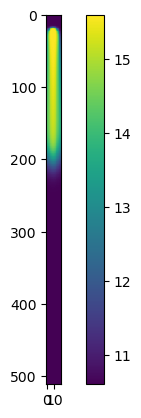

   Background velocity: tensor(0.0472) m/day
   Maximum    velocity: tensor(0.0554) m/day


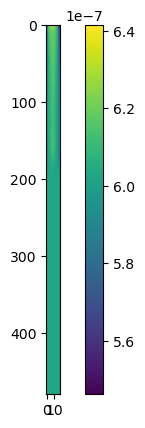

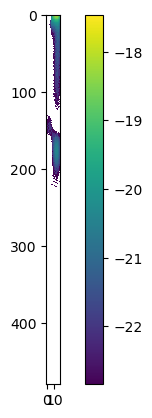

Datapoint: 1


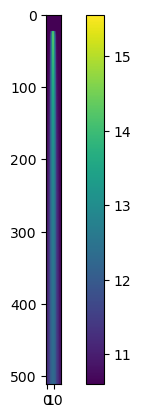

   Background velocity: tensor(0.1986) m/day
   Maximum    velocity: tensor(0.2284) m/day


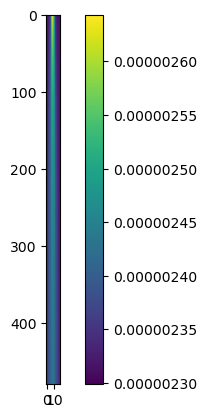

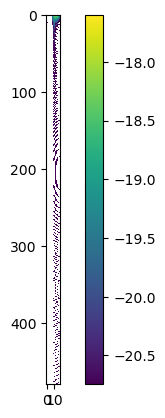

Datapoint: 2


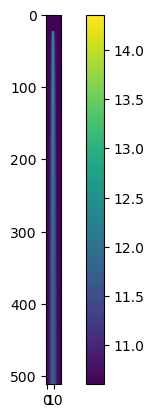

   Background velocity: tensor(0.4638) m/day
   Maximum    velocity: tensor(0.5132) m/day


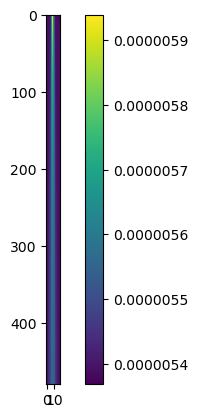

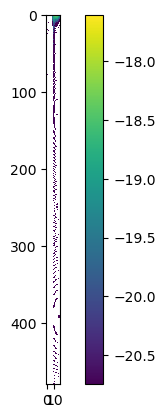

Datapoint: 3


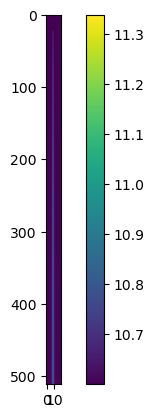

   Background velocity: tensor(4.9718) m/day
   Maximum    velocity: tensor(5.0764) m/day


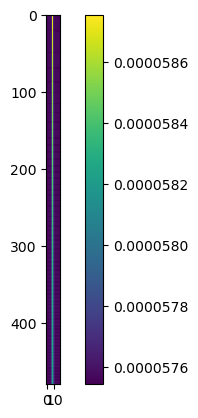

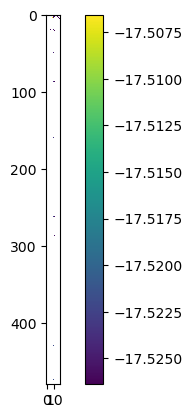

Datapoint: 4


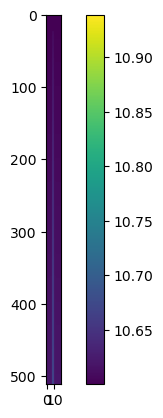

   Background velocity: tensor(11.6026) m/day
   Maximum    velocity: tensor(11.7168) m/day


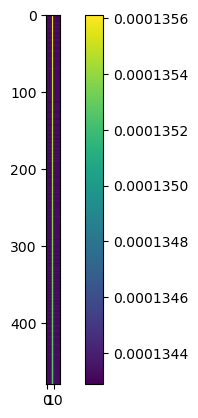

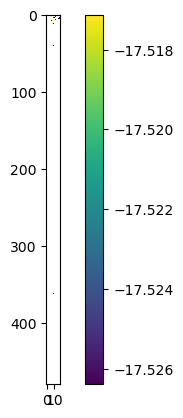

In [19]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file[list(file.keys())[4]]
    temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
    press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape).unsqueeze(0)
    perm = torch.tensor(dp['Permeability X [m^2]']).float().reshape(shape).unsqueeze(0)
    darcy_x, darcy_y = loss.get_darcy(temp, press, perm, 5.0)
    plt.imshow(temp.squeeze()[0:512])
    plt.colorbar()
    plt.show()
    print("   Background velocity: " + str(torch.min(darcy_x.squeeze()[32:512]) * 60*60*24) + " m/day")
    print("   Maximum    velocity: " + str(torch.max(darcy_x.squeeze()[32:512]) * 60*60*24) + " m/day")
    plt.imshow(torch.log(darcy_x.squeeze()[32:512]))
    plt.colorbar()
    plt.show()
    plt.imshow(torch.log(darcy_y.squeeze()[32:512]))
    plt.colorbar()
    plt.show()
    # plt.imshow(darcy_y.squeeze()[:64])
    # plt.colorbar()
    # plt.show()

Datapoint: 0
   0 Time  0.00000E+00 y


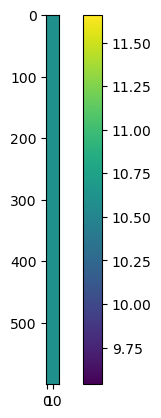

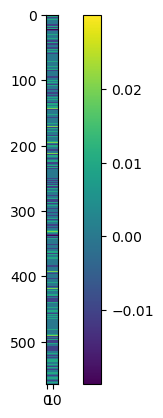

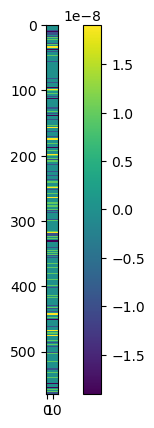

   1 Time  1.00000E-01 y


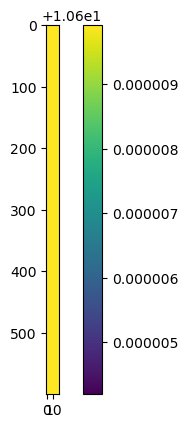

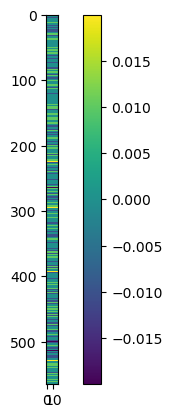

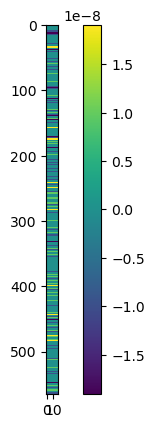

   2 Time  2.00000E+01 y


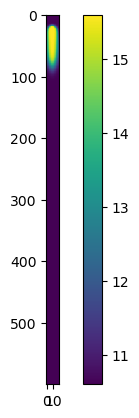

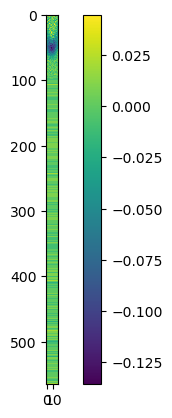

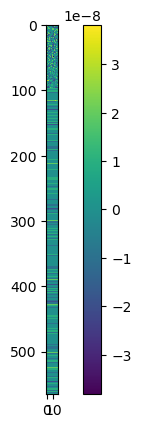

   3 Time  4.00000E+01 y


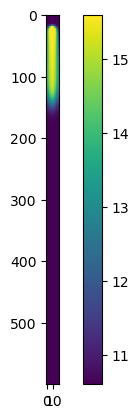

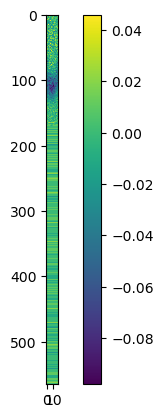

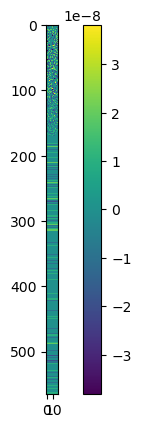

   4 Time  6.00000E+01 y


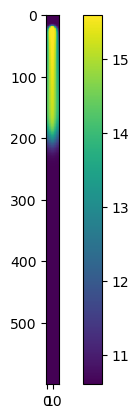

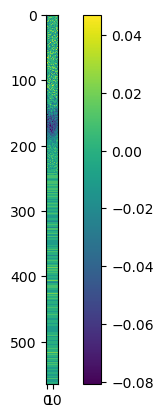

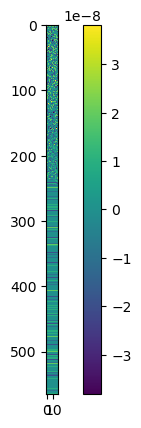

   5 Time  8.00000E+01 y


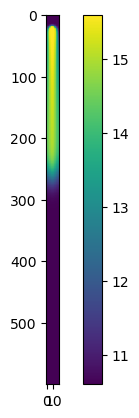

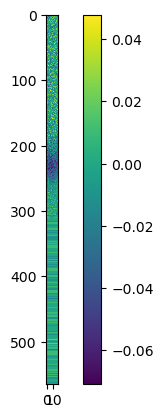

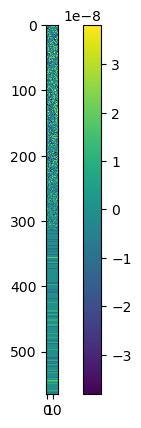

   6 Time  1.00000E+02 y


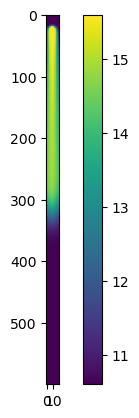

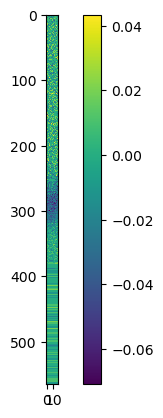

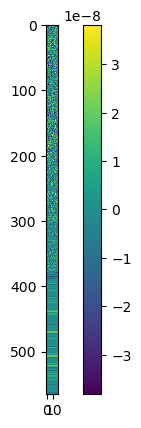

   7 Time  1.20000E+02 y


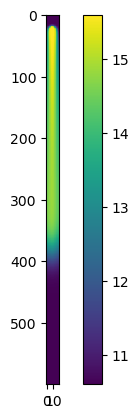

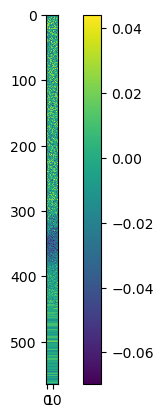

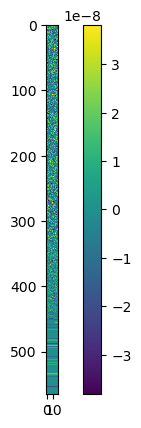

   8 Time  1.40000E+02 y


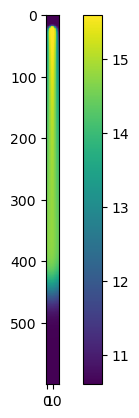

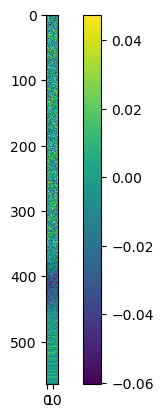

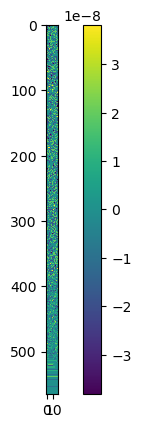

   9 Time  1.50000E+02 y


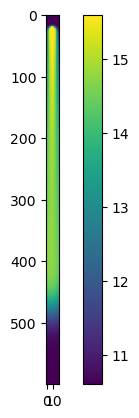

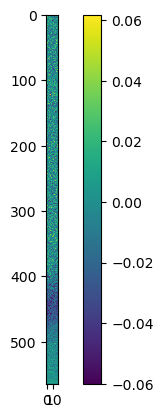

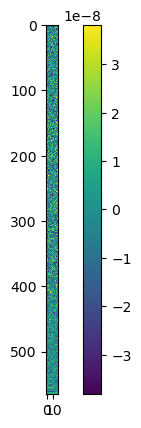

  10 Time  1.60000E+02 y


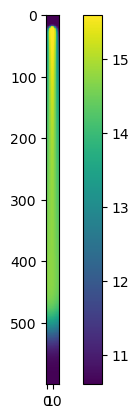

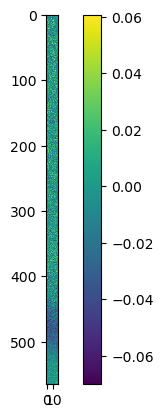

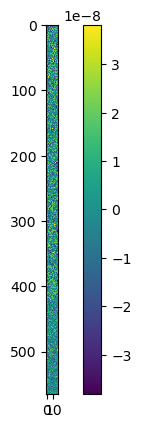

  11 Time  1.80000E+02 y


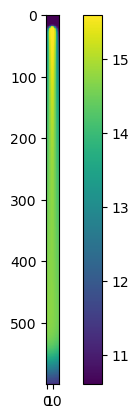

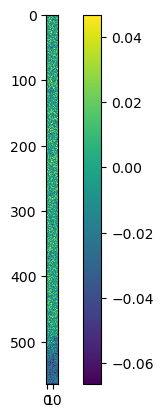

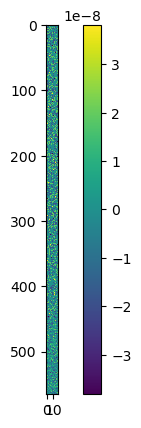

  12 Time  2.00000E+02 y


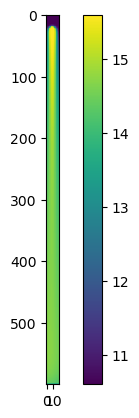

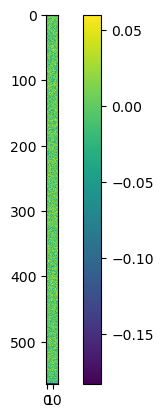

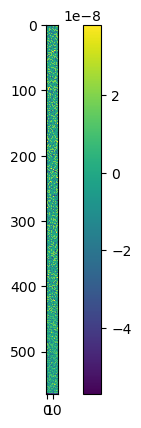

Datapoint: 1
   0 Time  0.00000E+00 y


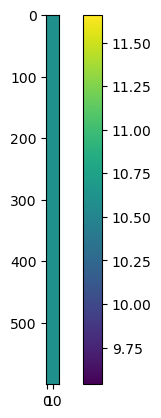

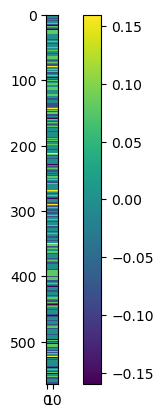

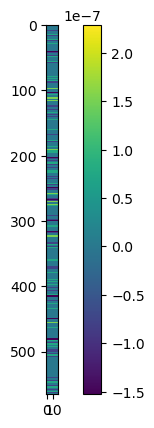

   1 Time  1.00000E-01 y


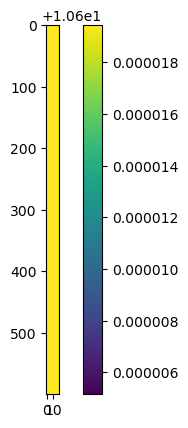

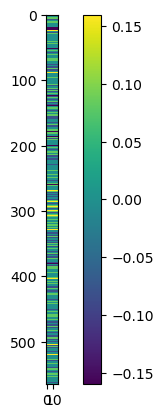

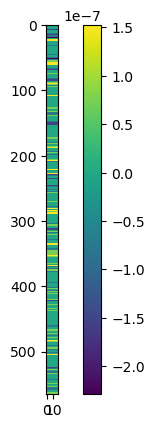

   2 Time  2.00000E+01 y


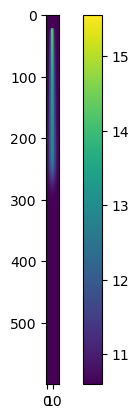

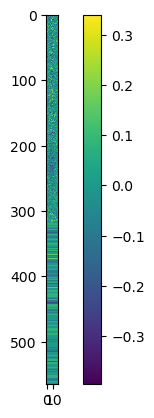

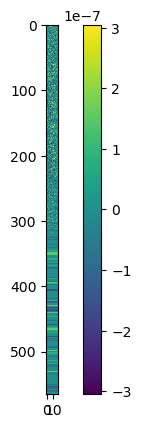

   3 Time  4.00000E+01 y


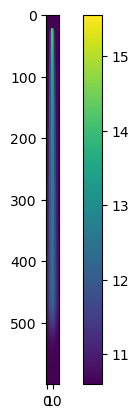

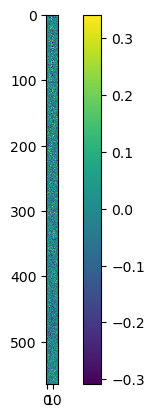

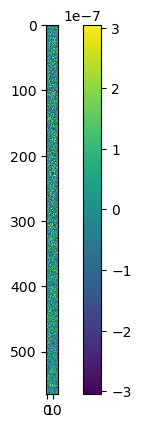

   4 Time  6.00000E+01 y


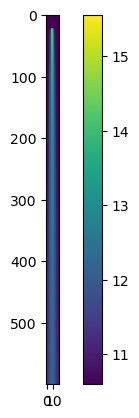

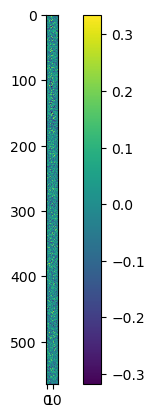

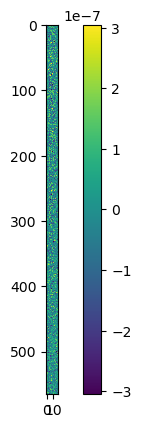

   5 Time  8.00000E+01 y


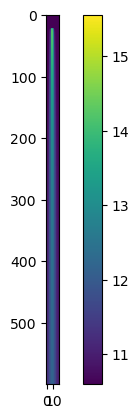

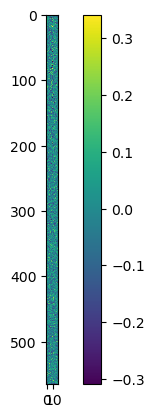

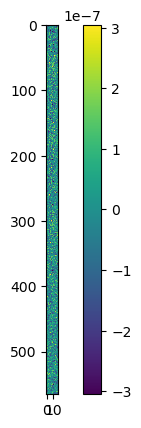

   6 Time  1.00000E+02 y


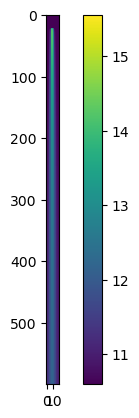

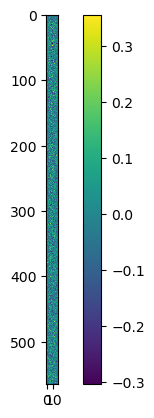

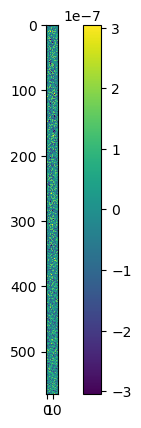

   7 Time  1.20000E+02 y


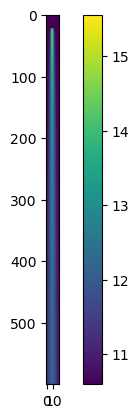

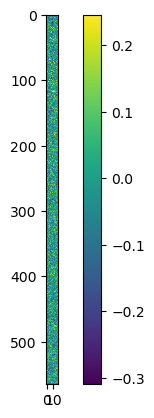

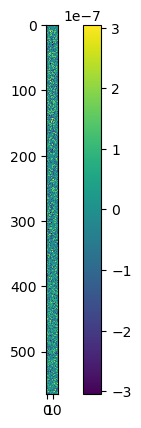

   8 Time  1.40000E+02 y


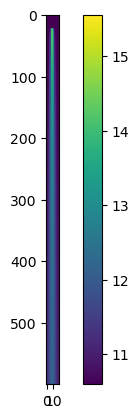

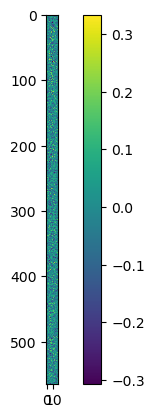

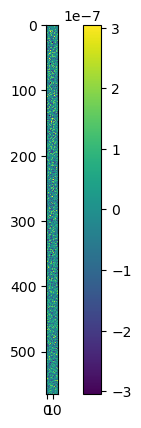

   9 Time  1.50000E+02 y


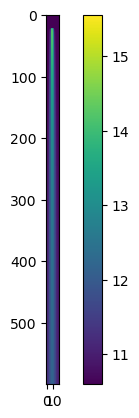

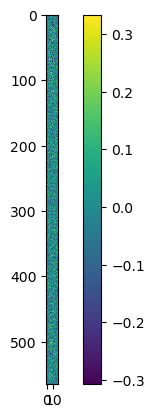

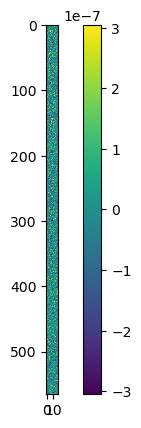

  10 Time  1.60000E+02 y


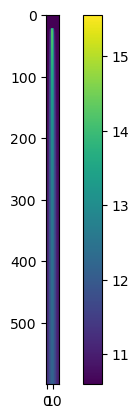

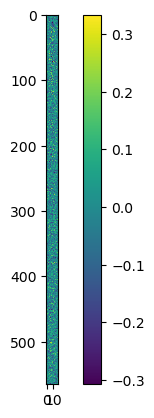

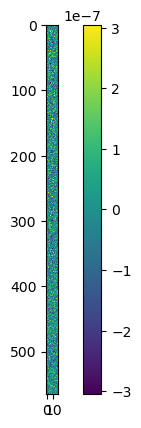

  11 Time  1.80000E+02 y


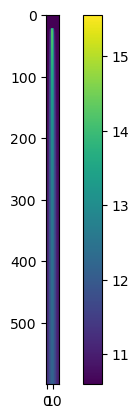

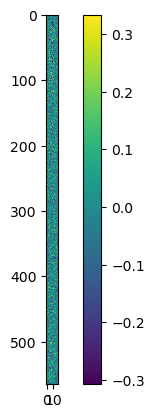

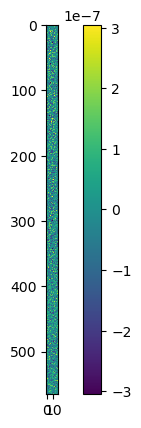

  12 Time  2.00000E+02 y


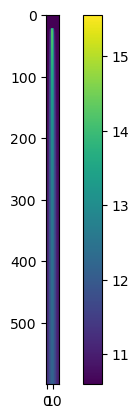

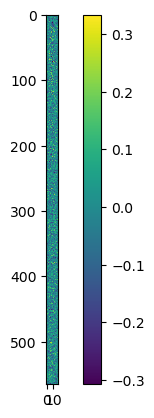

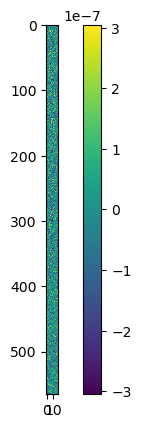

Datapoint: 2
   0 Time  0.00000E+00 y


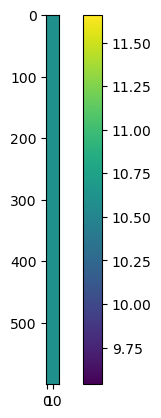

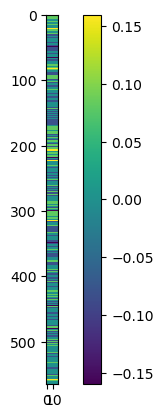

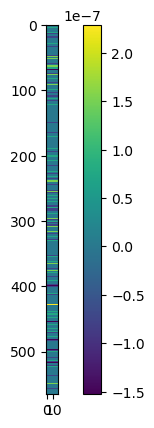

   1 Time  1.00000E-01 y


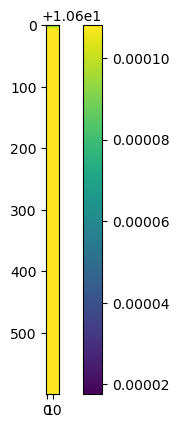

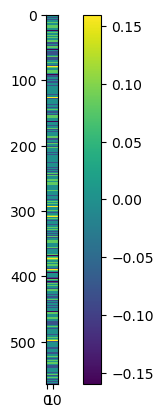

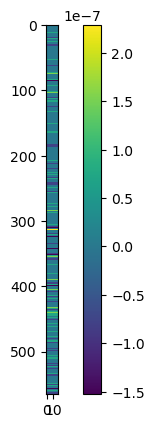

   2 Time  2.00000E+01 y


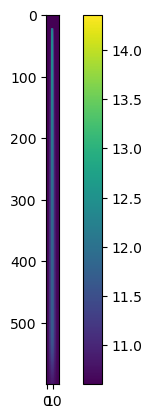

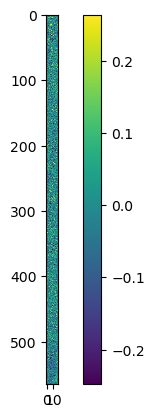

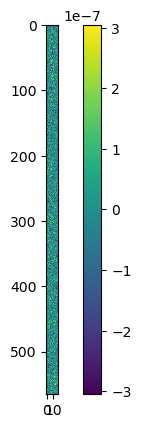

   3 Time  4.00000E+01 y


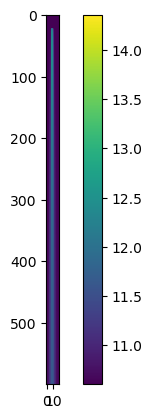

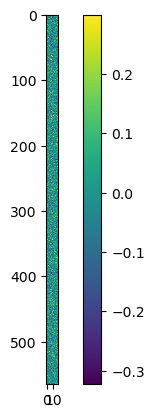

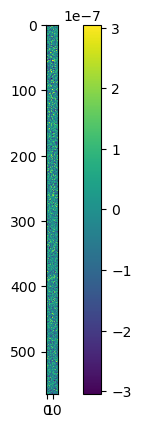

   4 Time  6.00000E+01 y


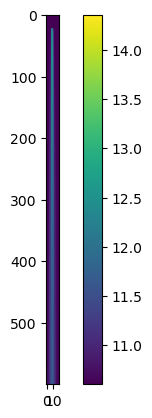

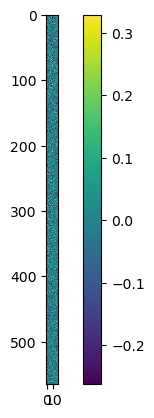

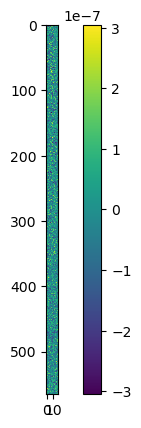

   5 Time  8.00000E+01 y


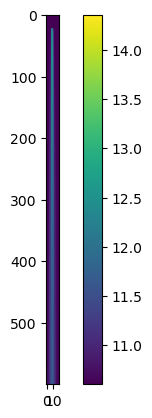

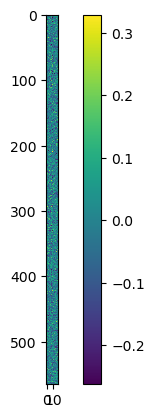

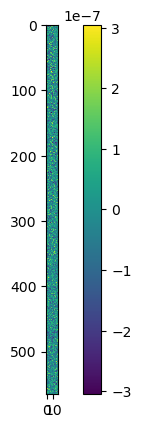

   6 Time  1.00000E+02 y


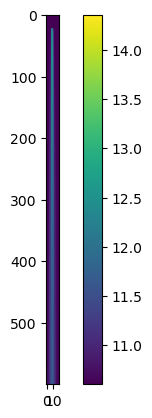

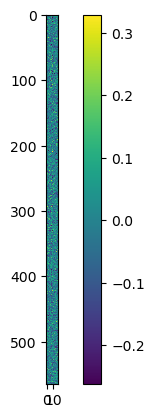

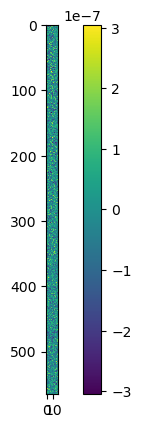

   7 Time  1.20000E+02 y


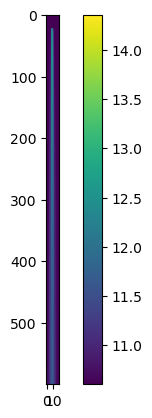

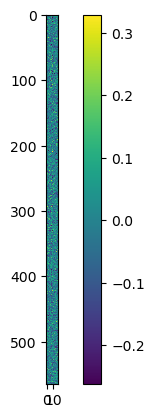

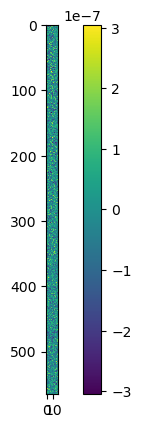

   8 Time  1.40000E+02 y


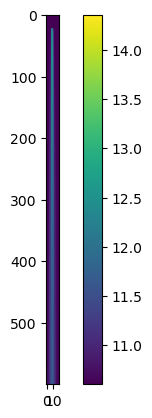

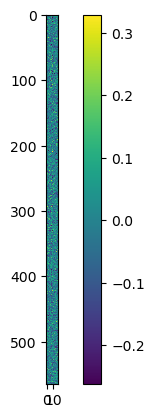

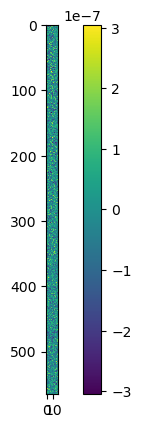

   9 Time  1.50000E+02 y


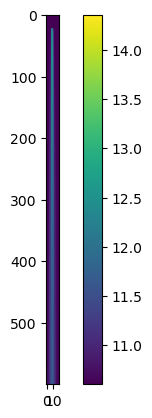

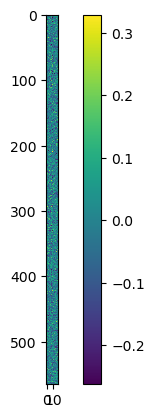

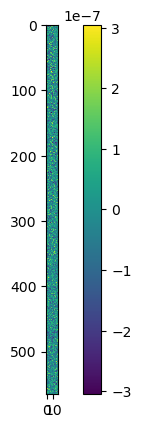

  10 Time  1.60000E+02 y


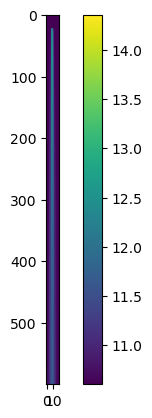

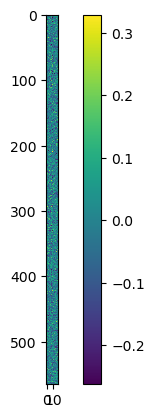

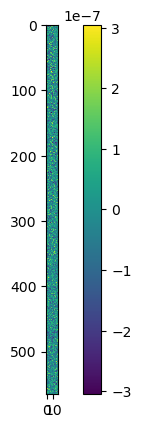

  11 Time  1.80000E+02 y


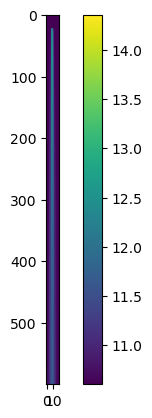

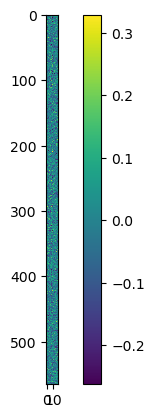

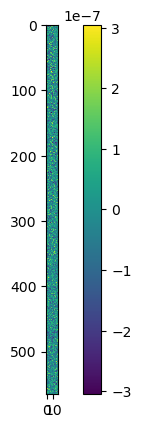

  12 Time  2.00000E+02 y


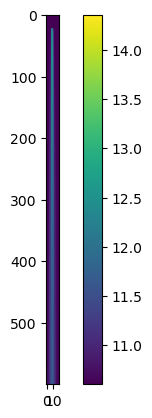

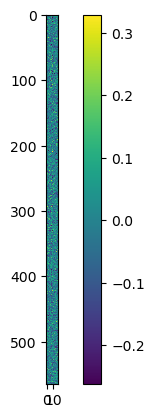

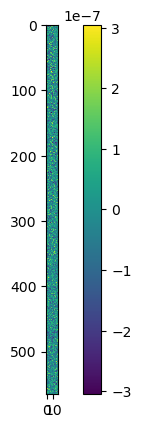

Datapoint: 3
   0 Time  0.00000E+00 y


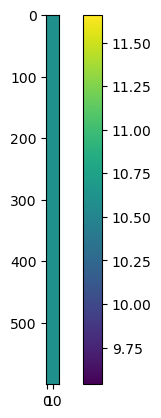

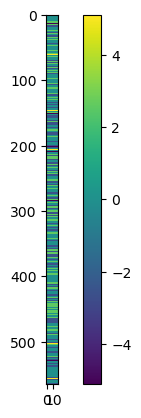

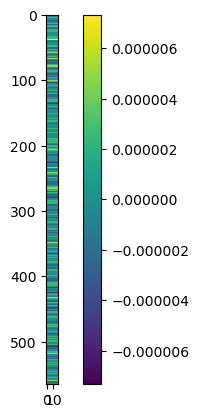

   1 Time  1.00000E-01 y


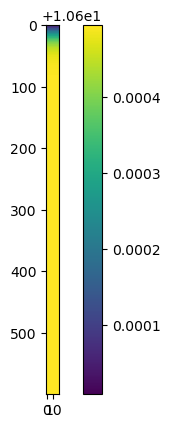

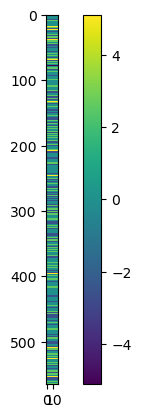

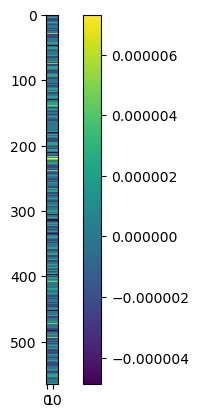

   2 Time  2.00000E+01 y


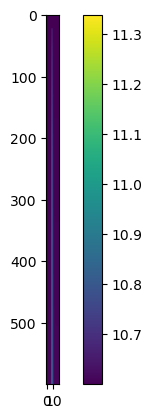

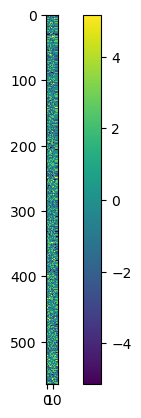

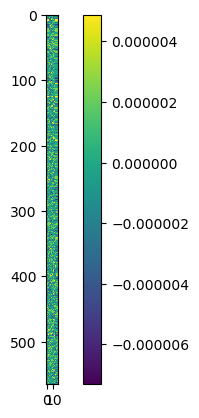

   3 Time  4.00000E+01 y


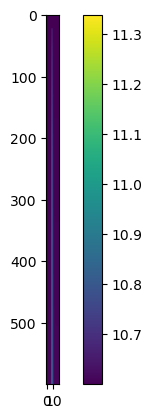

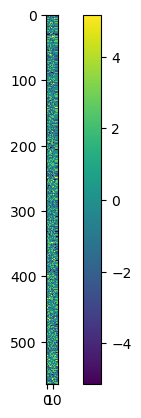

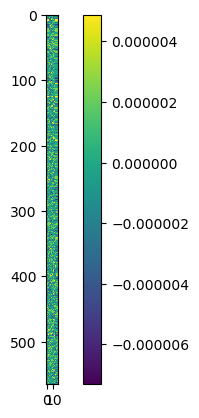

   4 Time  6.00000E+01 y


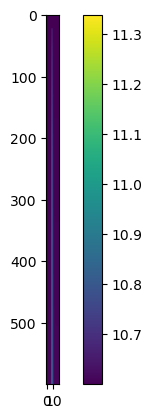

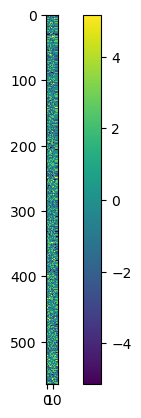

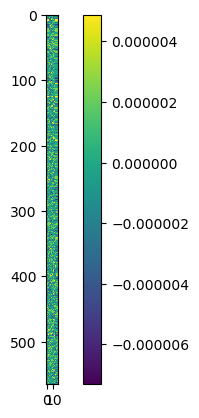

   5 Time  8.00000E+01 y


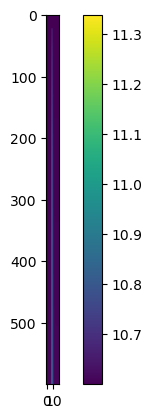

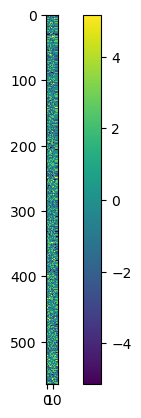

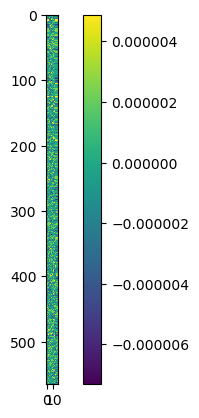

   6 Time  1.00000E+02 y


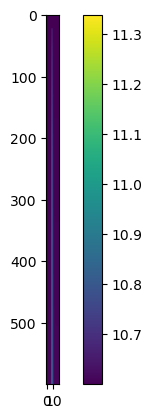

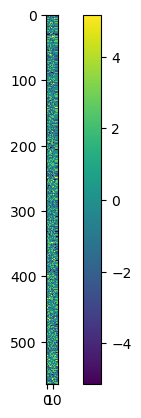

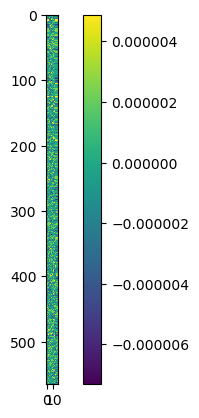

   7 Time  1.20000E+02 y


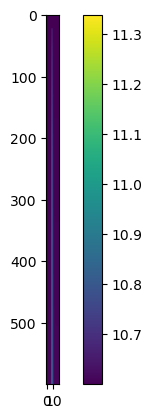

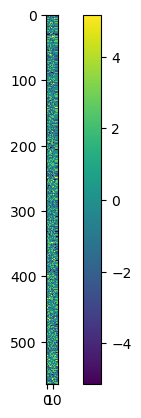

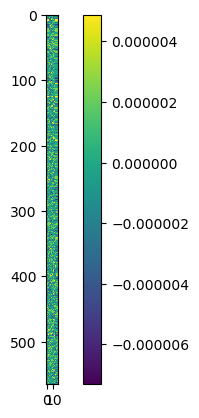

   8 Time  1.40000E+02 y


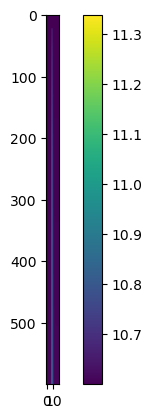

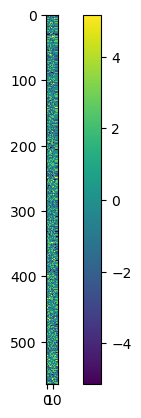

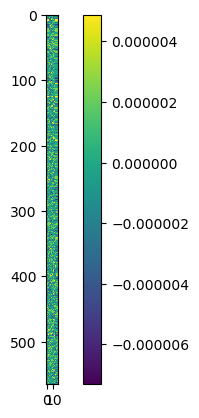

   9 Time  1.50000E+02 y


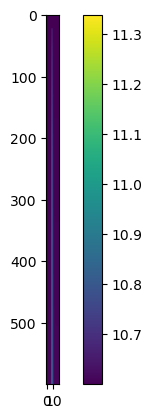

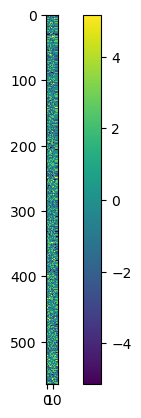

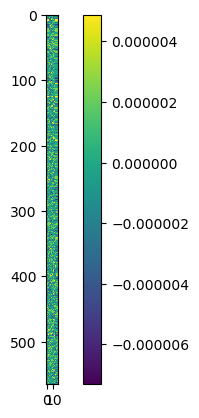

  10 Time  1.60000E+02 y


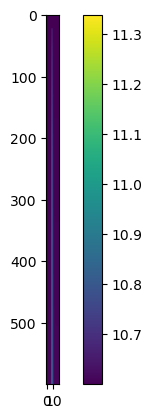

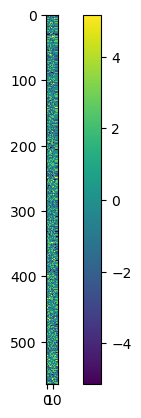

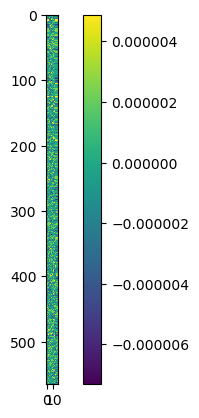

  11 Time  1.80000E+02 y


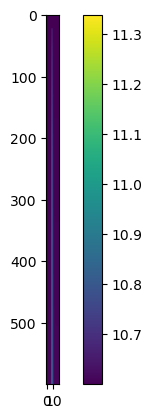

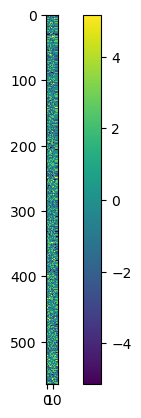

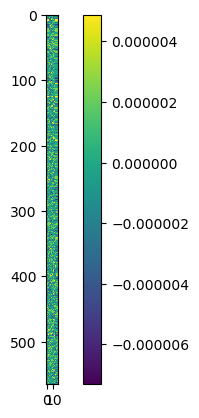

  12 Time  2.00000E+02 y


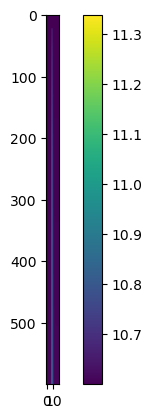

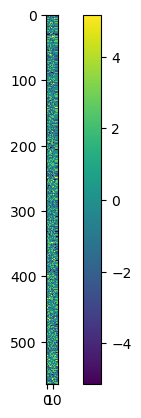

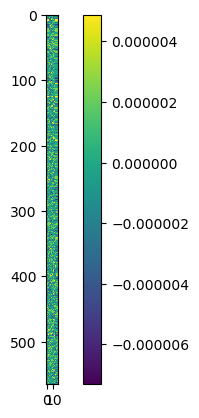

Datapoint: 4
   0 Time  0.00000E+00 y


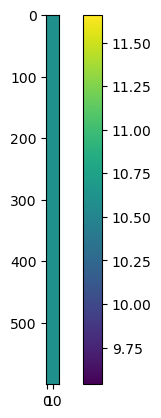

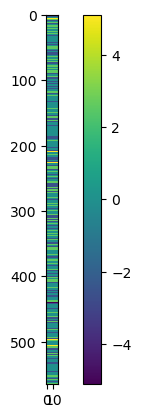

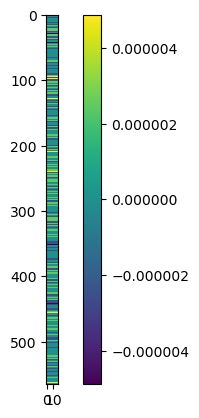

   1 Time  1.00000E-01 y


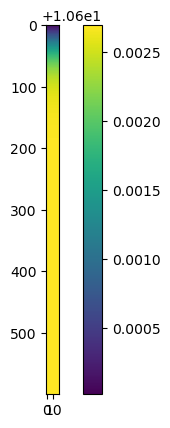

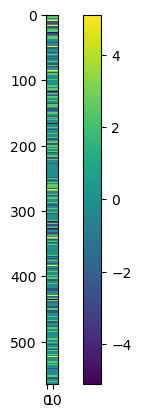

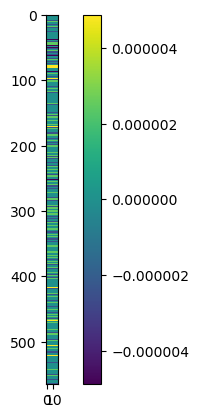

   2 Time  2.00000E+01 y


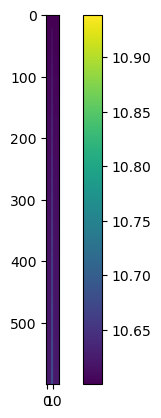

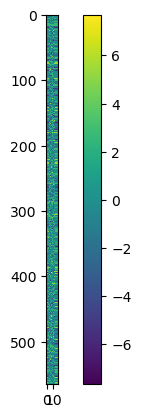

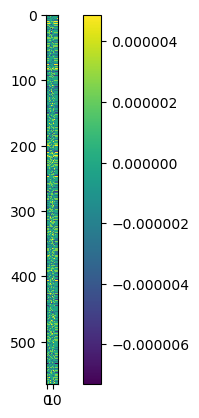

   3 Time  4.00000E+01 y


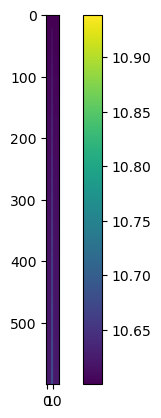

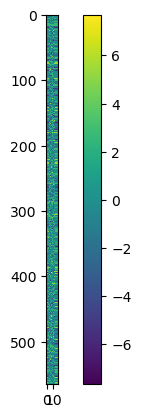

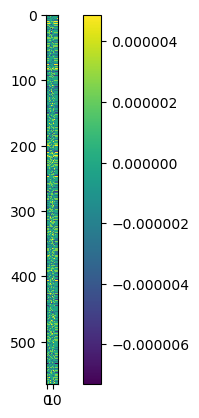

   4 Time  6.00000E+01 y


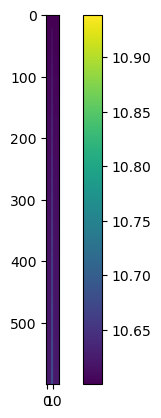

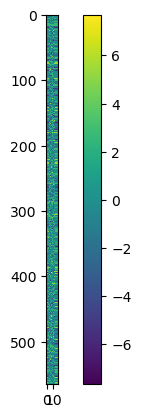

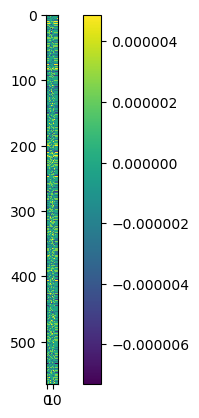

   5 Time  8.00000E+01 y


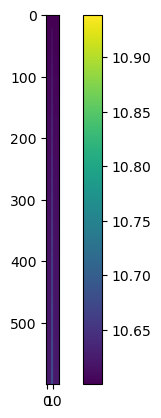

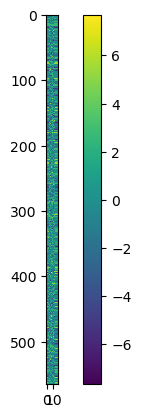

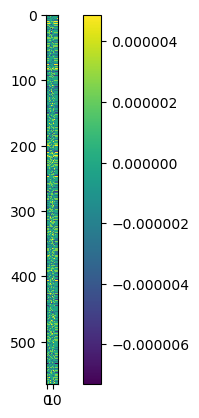

   6 Time  1.00000E+02 y


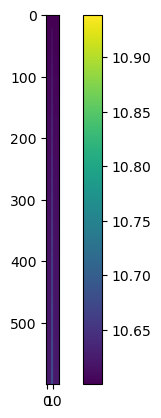

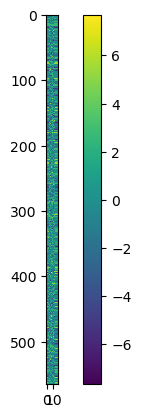

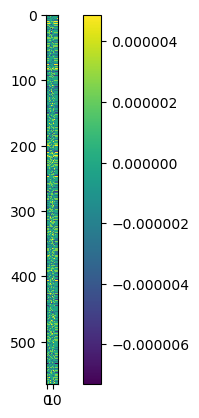

   7 Time  1.20000E+02 y


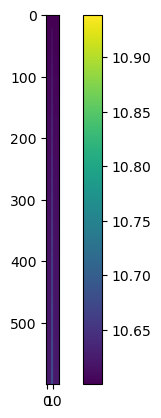

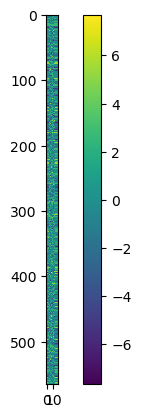

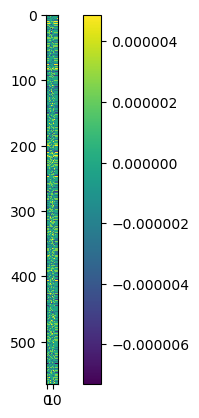

   8 Time  1.40000E+02 y


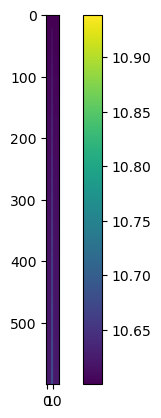

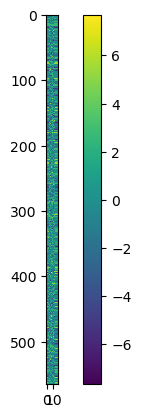

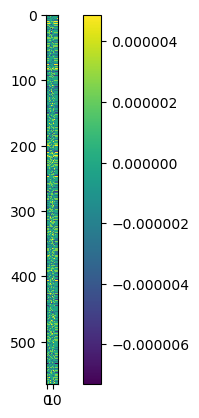

   9 Time  1.50000E+02 y


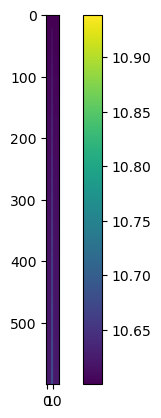

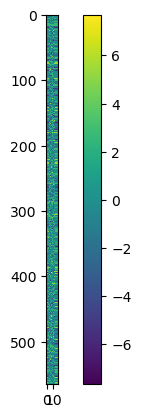

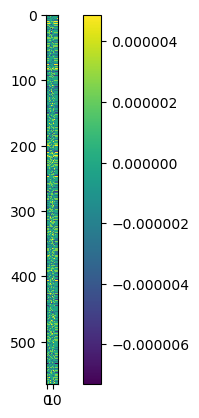

  10 Time  1.60000E+02 y


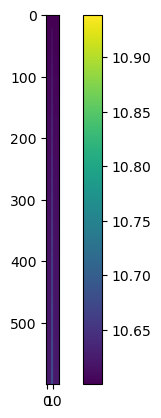

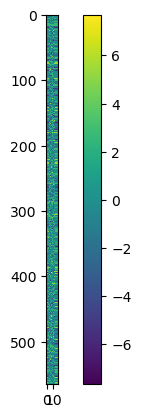

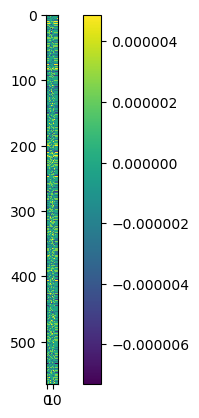

  11 Time  1.80000E+02 y


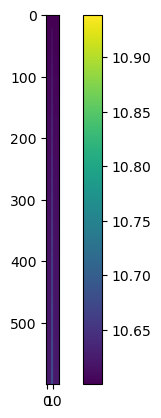

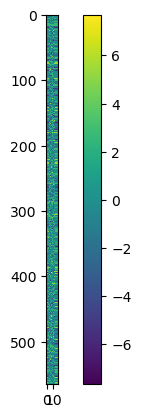

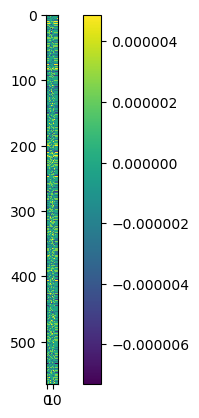

  12 Time  2.00000E+02 y


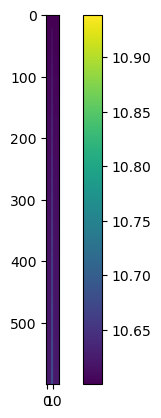

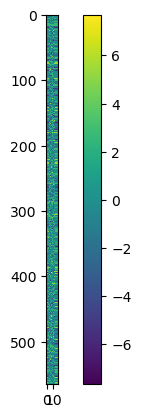

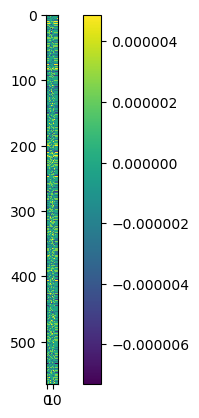

In [6]:

upper_end = 1024
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    for time in list(file.keys()):
        print(time)
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
        press = torch.tensor(dp['Liquid Pressure [Pa]']).float().reshape(shape).unsqueeze(0)
        perm = torch.tensor(dp['Permeability X [m^2]']).float().reshape(shape).unsqueeze(0)
        plt.imshow(temp.squeeze()[0:upper_end])
        plt.colorbar()
        plt.show()
        res_ener = loss.get_energy_error(temp, press, perm, 5.0)
        plt.imshow(res_ener.squeeze()[32:upper_end])
        plt.colorbar()
        plt.show()
        res_cont = loss.get_continuity_error(temp, press, perm, 5.0)
        plt.imshow(res_cont.squeeze()[32:upper_end])
        plt.colorbar()
        plt.show()

Datapoint: 0
   0 Time  0.00000E+00 y


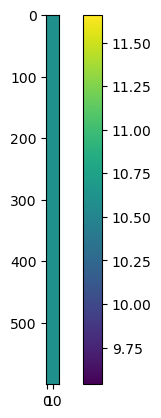

   Delta (abs) to:    1 Time  1.00000E-01 y


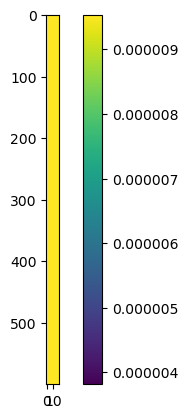

   Delta (log) to:    1 Time  1.00000E-01 y


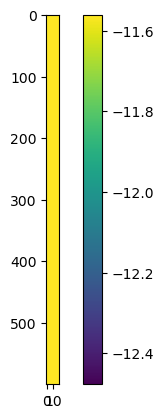

   1 Time  1.00000E-01 y


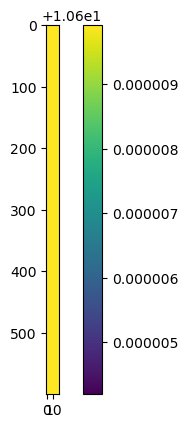

   Delta (abs) to:    2 Time  2.00000E+01 y


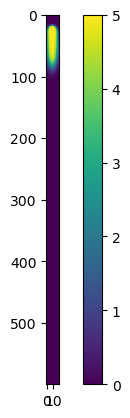

   Delta (log) to:    2 Time  2.00000E+01 y


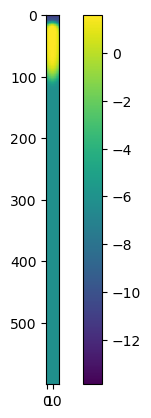

   2 Time  2.00000E+01 y


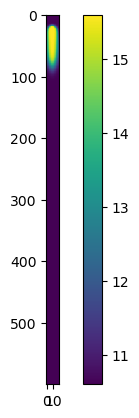

   Delta (abs) to:    3 Time  4.00000E+01 y


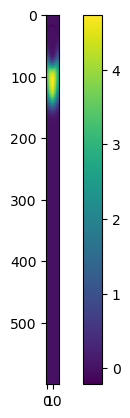

   Delta (log) to:    3 Time  4.00000E+01 y


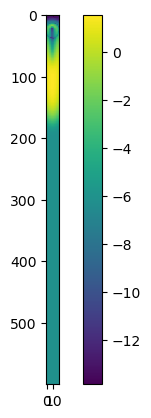

   3 Time  4.00000E+01 y


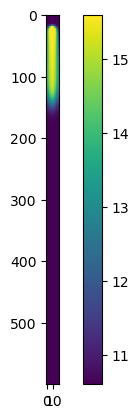

   Delta (abs) to:    4 Time  6.00000E+01 y


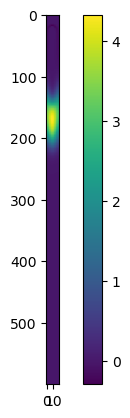

   Delta (log) to:    4 Time  6.00000E+01 y


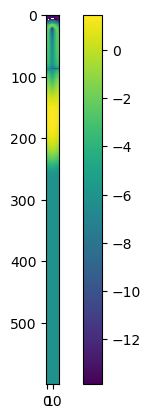

   4 Time  6.00000E+01 y


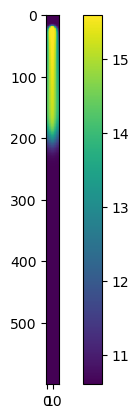

   Delta (abs) to:    5 Time  8.00000E+01 y


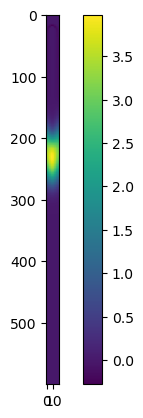

   Delta (log) to:    5 Time  8.00000E+01 y


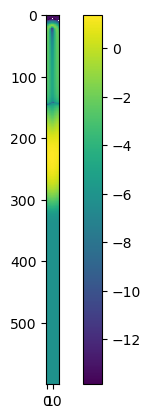

   5 Time  8.00000E+01 y


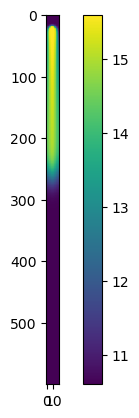

   Delta (abs) to:    6 Time  1.00000E+02 y


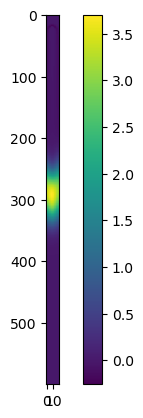

   Delta (log) to:    6 Time  1.00000E+02 y


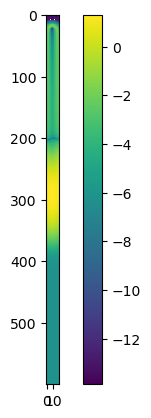

   6 Time  1.00000E+02 y


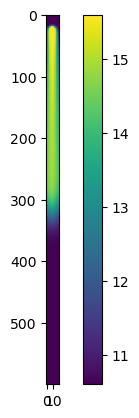

   Delta (abs) to:    7 Time  1.20000E+02 y


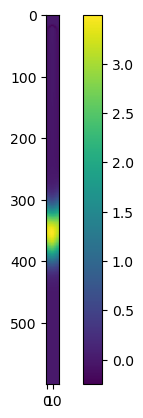

   Delta (log) to:    7 Time  1.20000E+02 y


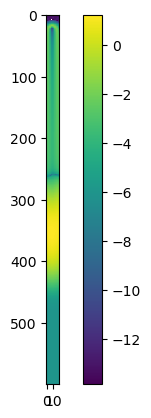

   7 Time  1.20000E+02 y


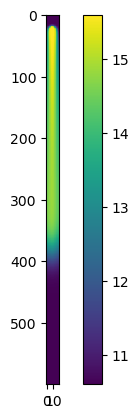

   Delta (abs) to:    8 Time  1.40000E+02 y


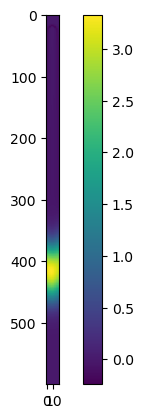

   Delta (log) to:    8 Time  1.40000E+02 y


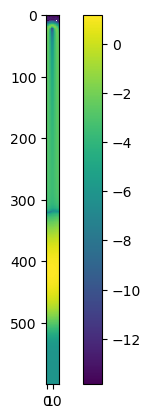

   8 Time  1.40000E+02 y


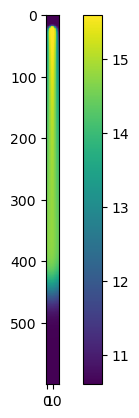

   Delta (abs) to:    9 Time  1.50000E+02 y


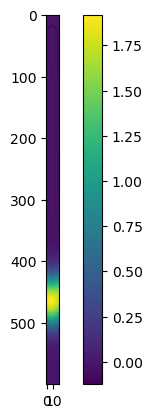

   Delta (log) to:    9 Time  1.50000E+02 y


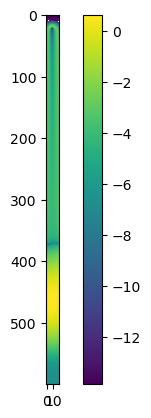

   9 Time  1.50000E+02 y


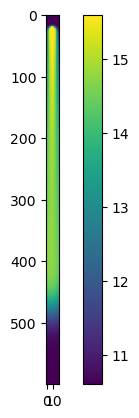

   Delta (abs) to:   10 Time  1.60000E+02 y


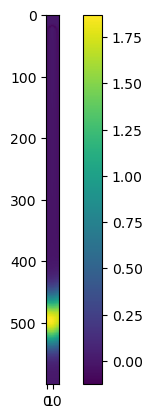

   Delta (log) to:   10 Time  1.60000E+02 y


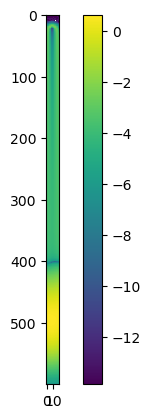

  10 Time  1.60000E+02 y


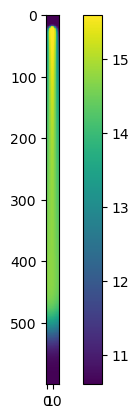

   Delta (abs) to:   11 Time  1.80000E+02 y


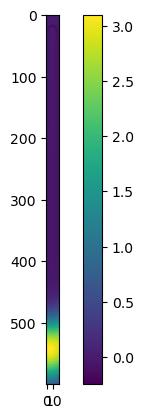

   Delta (log) to:   11 Time  1.80000E+02 y


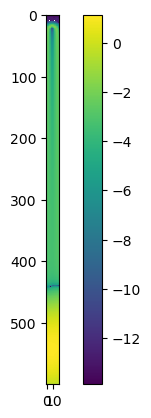

  11 Time  1.80000E+02 y


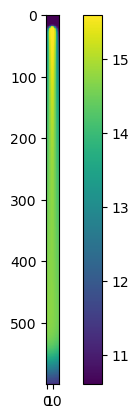

   Delta (abs) to:   12 Time  2.00000E+02 y


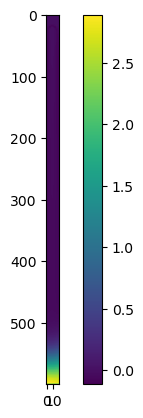

   Delta (log) to:   12 Time  2.00000E+02 y


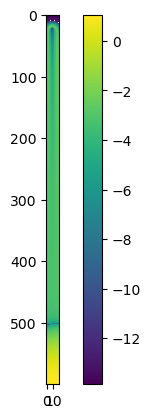

  12 Time  2.00000E+02 y


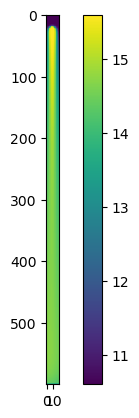

Datapoint: 1
   0 Time  0.00000E+00 y


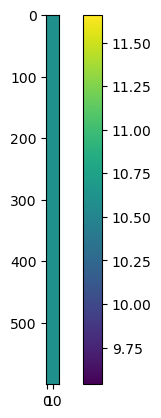

   Delta (abs) to:    1 Time  1.00000E-01 y


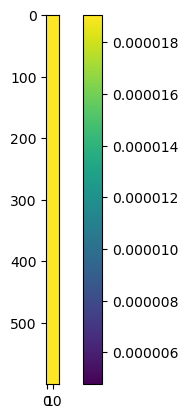

   Delta (log) to:    1 Time  1.00000E-01 y


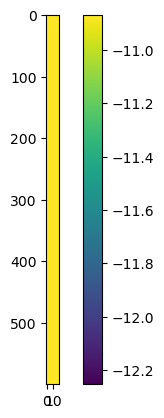

   1 Time  1.00000E-01 y


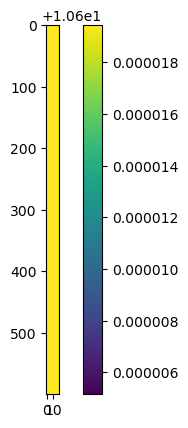

   Delta (abs) to:    2 Time  2.00000E+01 y


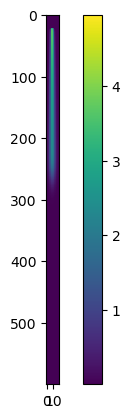

   Delta (log) to:    2 Time  2.00000E+01 y


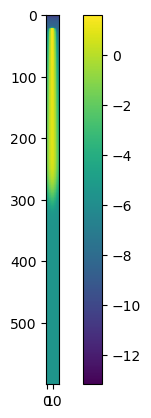

   2 Time  2.00000E+01 y


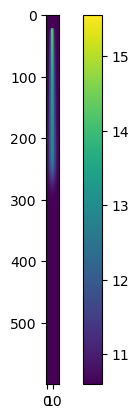

   Delta (abs) to:    3 Time  4.00000E+01 y


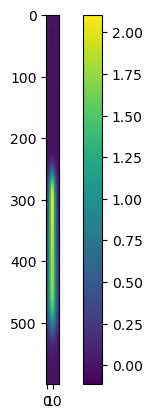

   Delta (log) to:    3 Time  4.00000E+01 y


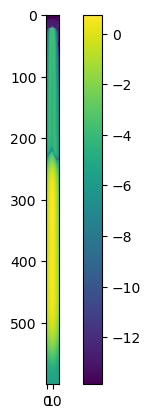

   3 Time  4.00000E+01 y


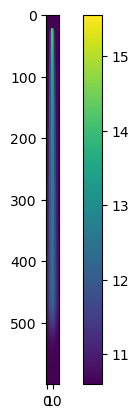

   Delta (abs) to:    4 Time  6.00000E+01 y


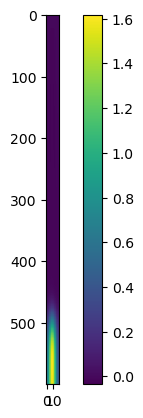

   Delta (log) to:    4 Time  6.00000E+01 y


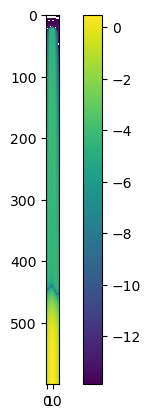

   4 Time  6.00000E+01 y


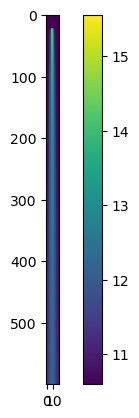

   Delta (abs) to:    5 Time  8.00000E+01 y


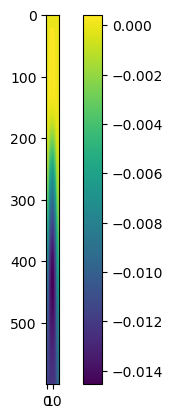

   Delta (log) to:    5 Time  8.00000E+01 y


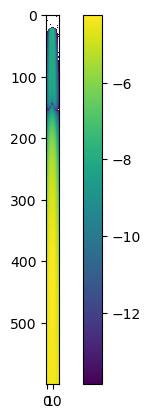

   5 Time  8.00000E+01 y


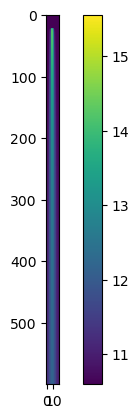

   Delta (abs) to:    6 Time  1.00000E+02 y


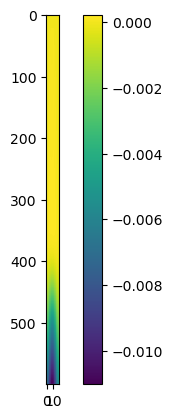

   Delta (log) to:    6 Time  1.00000E+02 y


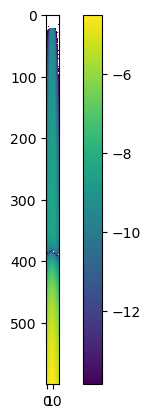

   6 Time  1.00000E+02 y


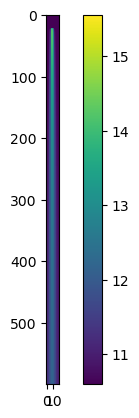

   Delta (abs) to:    7 Time  1.20000E+02 y


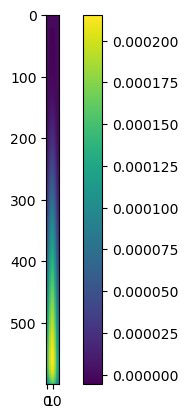

   Delta (log) to:    7 Time  1.20000E+02 y


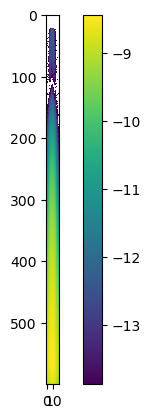

   7 Time  1.20000E+02 y


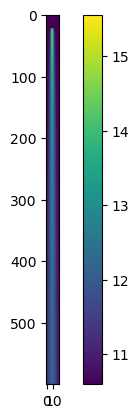

   Delta (abs) to:    8 Time  1.40000E+02 y


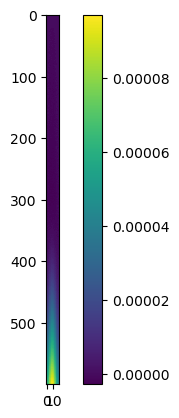

   Delta (log) to:    8 Time  1.40000E+02 y


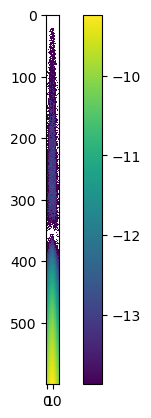

   8 Time  1.40000E+02 y


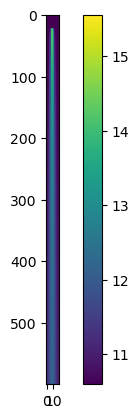

   Delta (abs) to:    9 Time  1.50000E+02 y


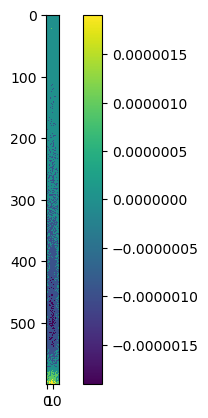

   Delta (log) to:    9 Time  1.50000E+02 y


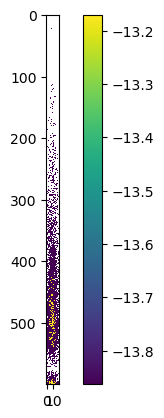

   9 Time  1.50000E+02 y


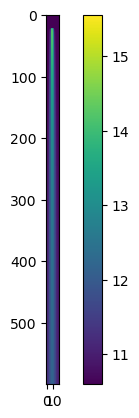

   Delta (abs) to:   10 Time  1.60000E+02 y


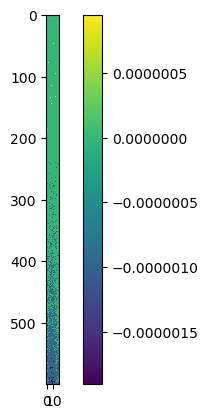

   Delta (log) to:   10 Time  1.60000E+02 y


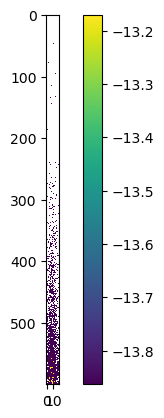

  10 Time  1.60000E+02 y


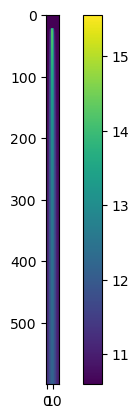

   Delta (abs) to:   11 Time  1.80000E+02 y


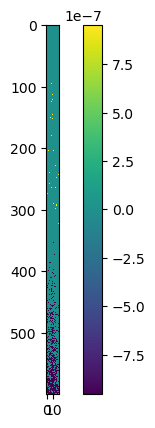

   Delta (log) to:   11 Time  1.80000E+02 y


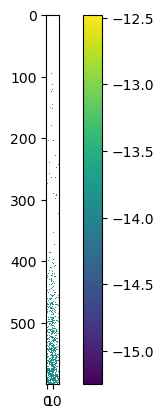

  11 Time  1.80000E+02 y


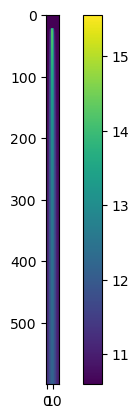

   Delta (abs) to:   12 Time  2.00000E+02 y


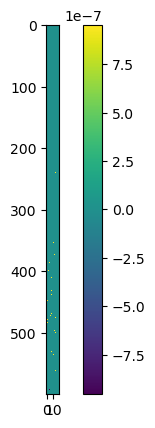

   Delta (log) to:   12 Time  2.00000E+02 y


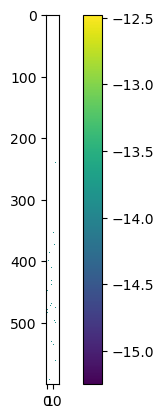

  12 Time  2.00000E+02 y


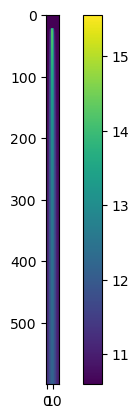

Datapoint: 2
   0 Time  0.00000E+00 y


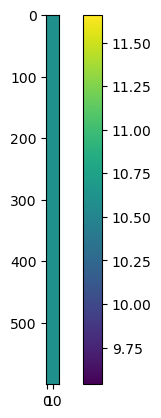

   Delta (abs) to:    1 Time  1.00000E-01 y


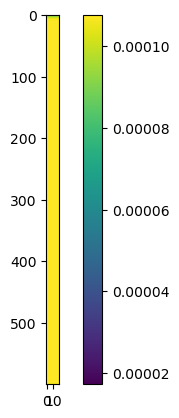

   Delta (log) to:    1 Time  1.00000E-01 y


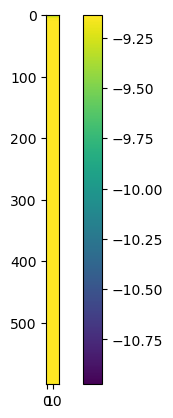

   1 Time  1.00000E-01 y


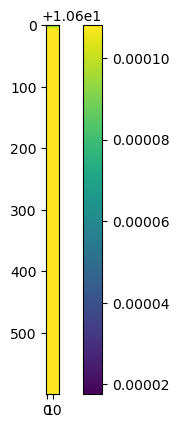

   Delta (abs) to:    2 Time  2.00000E+01 y


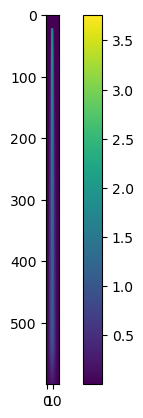

   Delta (log) to:    2 Time  2.00000E+01 y


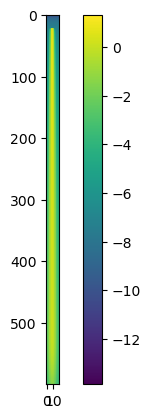

   2 Time  2.00000E+01 y


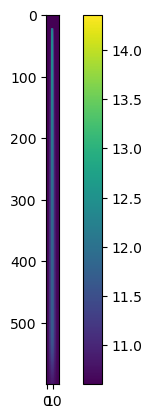

   Delta (abs) to:    3 Time  4.00000E+01 y


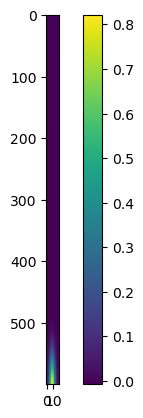

   Delta (log) to:    3 Time  4.00000E+01 y


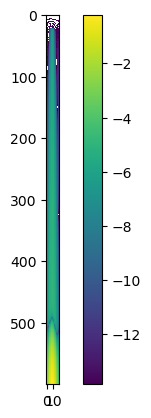

   3 Time  4.00000E+01 y


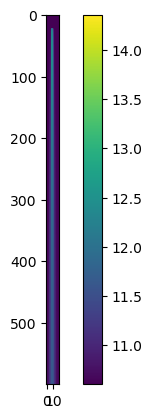

   Delta (abs) to:    4 Time  6.00000E+01 y


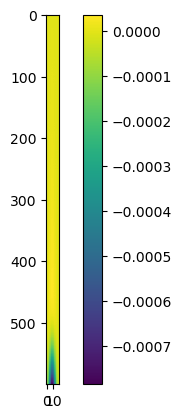

   Delta (log) to:    4 Time  6.00000E+01 y


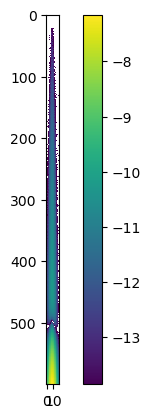

   4 Time  6.00000E+01 y


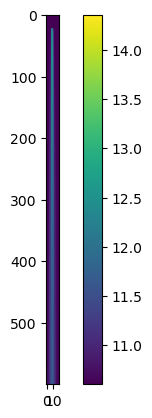

   Delta (abs) to:    5 Time  8.00000E+01 y


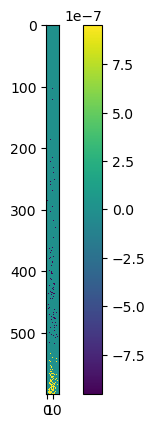

   Delta (log) to:    5 Time  8.00000E+01 y


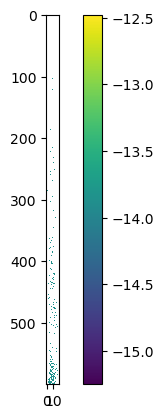

   5 Time  8.00000E+01 y


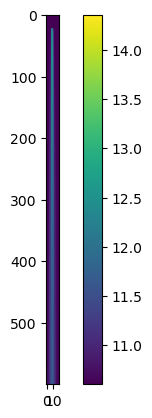

   Delta (abs) to:    6 Time  1.00000E+02 y


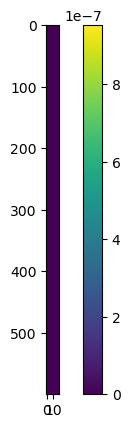

   Delta (log) to:    6 Time  1.00000E+02 y


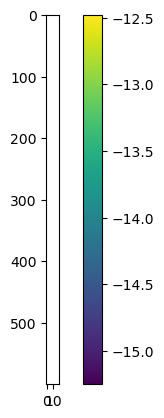

   6 Time  1.00000E+02 y


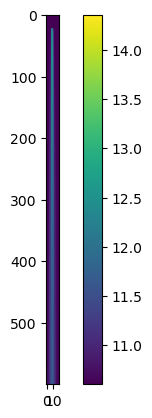

   Delta (abs) to:    7 Time  1.20000E+02 y


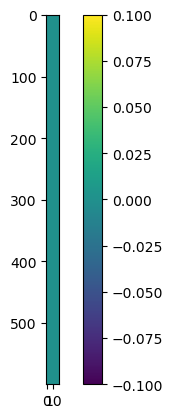

   Delta (log) to:    7 Time  1.20000E+02 y


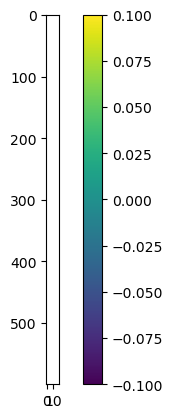

   7 Time  1.20000E+02 y


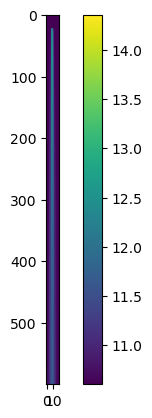

   Delta (abs) to:    8 Time  1.40000E+02 y


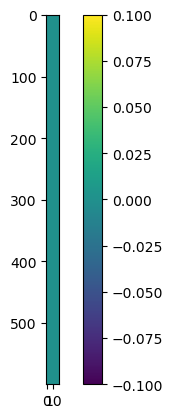

   Delta (log) to:    8 Time  1.40000E+02 y


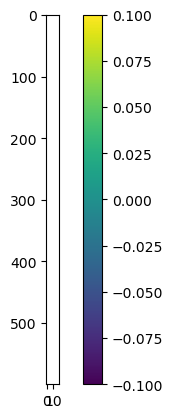

   8 Time  1.40000E+02 y


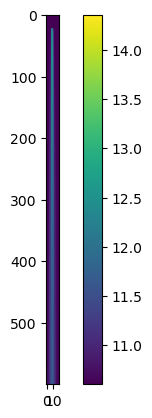

   Delta (abs) to:    9 Time  1.50000E+02 y


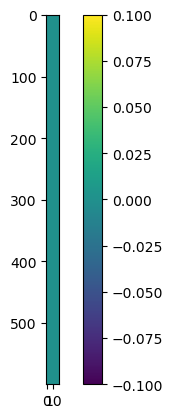

   Delta (log) to:    9 Time  1.50000E+02 y


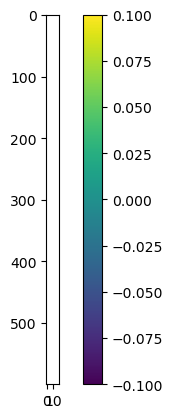

   9 Time  1.50000E+02 y


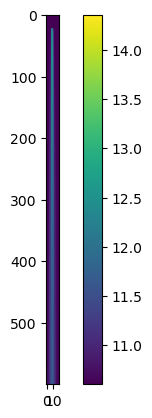

   Delta (abs) to:   10 Time  1.60000E+02 y


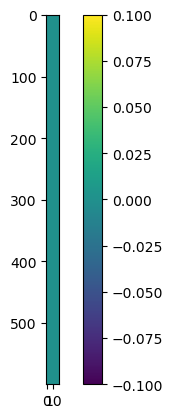

   Delta (log) to:   10 Time  1.60000E+02 y


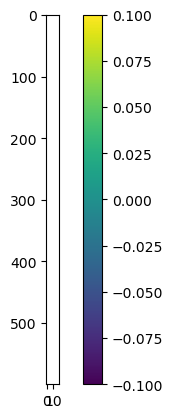

  10 Time  1.60000E+02 y


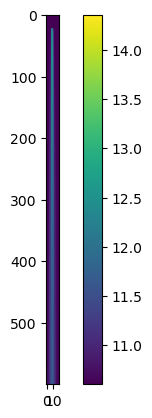

   Delta (abs) to:   11 Time  1.80000E+02 y


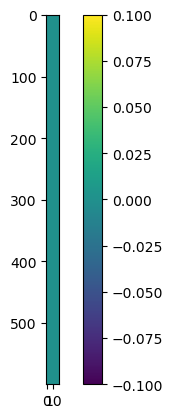

   Delta (log) to:   11 Time  1.80000E+02 y


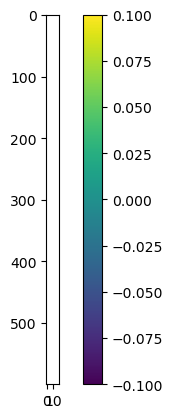

  11 Time  1.80000E+02 y


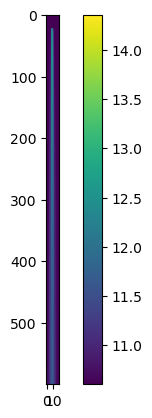

   Delta (abs) to:   12 Time  2.00000E+02 y


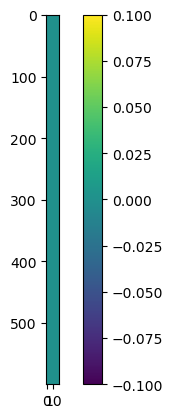

   Delta (log) to:   12 Time  2.00000E+02 y


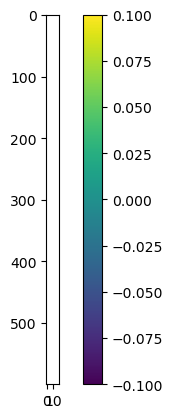

  12 Time  2.00000E+02 y


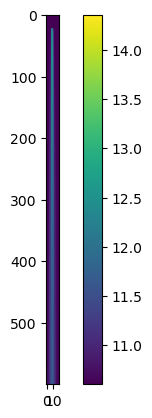

Datapoint: 3
   0 Time  0.00000E+00 y


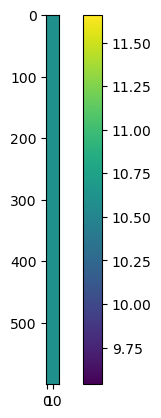

   Delta (abs) to:    1 Time  1.00000E-01 y


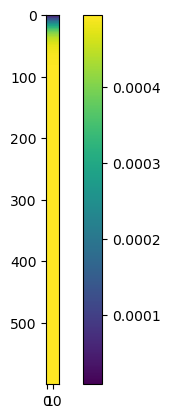

   Delta (log) to:    1 Time  1.00000E-01 y


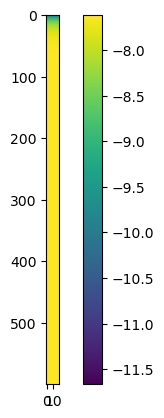

   1 Time  1.00000E-01 y


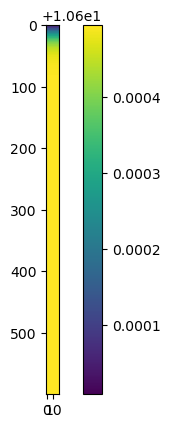

   Delta (abs) to:    2 Time  2.00000E+01 y


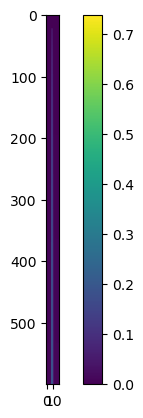

   Delta (log) to:    2 Time  2.00000E+01 y


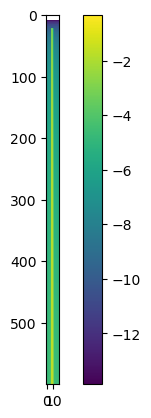

   2 Time  2.00000E+01 y


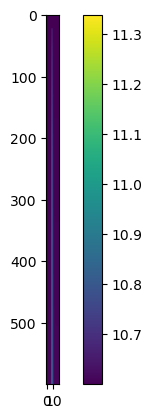

   Delta (abs) to:    3 Time  4.00000E+01 y


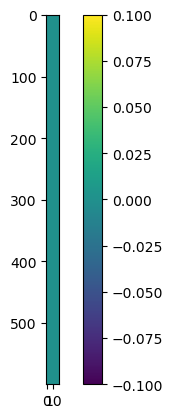

   Delta (log) to:    3 Time  4.00000E+01 y


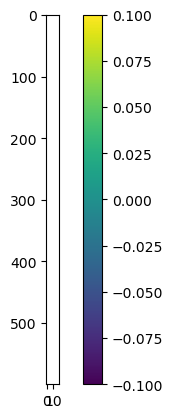

   3 Time  4.00000E+01 y


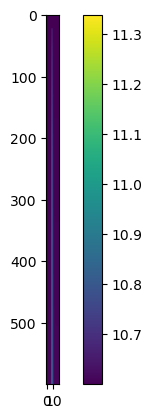

   Delta (abs) to:    4 Time  6.00000E+01 y


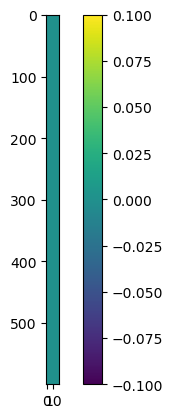

   Delta (log) to:    4 Time  6.00000E+01 y


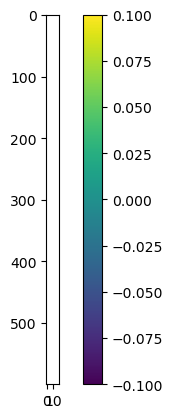

   4 Time  6.00000E+01 y


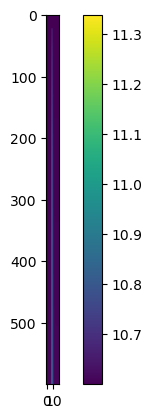

   Delta (abs) to:    5 Time  8.00000E+01 y


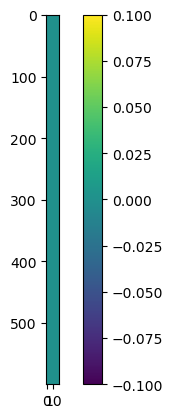

   Delta (log) to:    5 Time  8.00000E+01 y


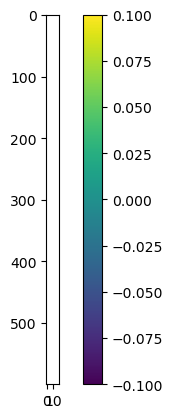

   5 Time  8.00000E+01 y


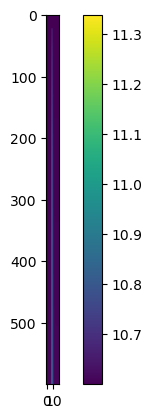

   Delta (abs) to:    6 Time  1.00000E+02 y


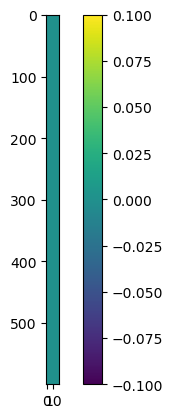

   Delta (log) to:    6 Time  1.00000E+02 y


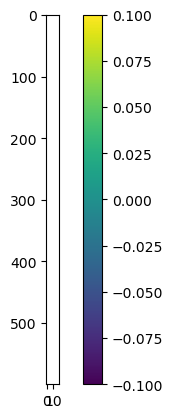

   6 Time  1.00000E+02 y


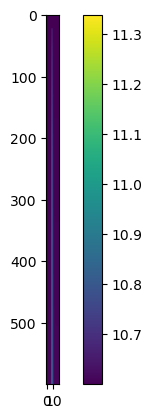

   Delta (abs) to:    7 Time  1.20000E+02 y


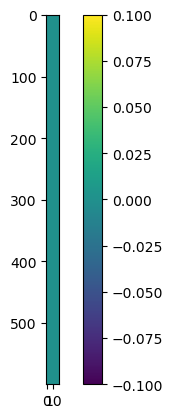

   Delta (log) to:    7 Time  1.20000E+02 y


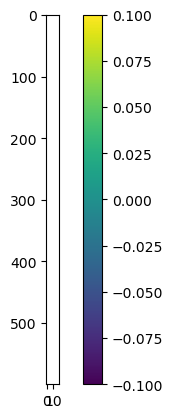

   7 Time  1.20000E+02 y


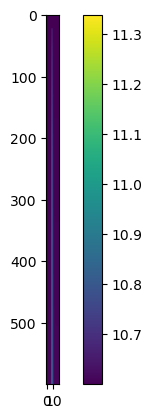

   Delta (abs) to:    8 Time  1.40000E+02 y


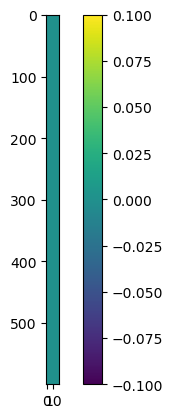

   Delta (log) to:    8 Time  1.40000E+02 y


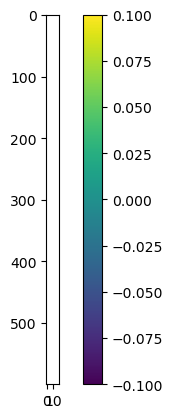

   8 Time  1.40000E+02 y


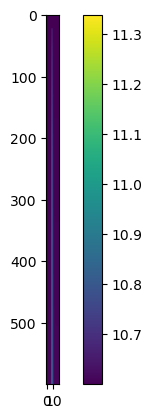

   Delta (abs) to:    9 Time  1.50000E+02 y


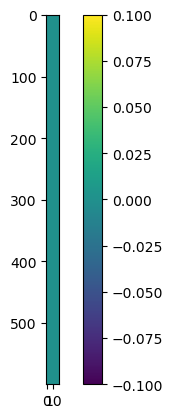

   Delta (log) to:    9 Time  1.50000E+02 y


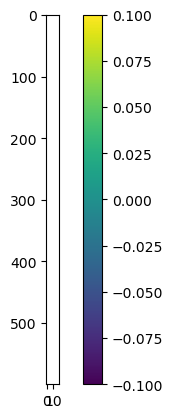

   9 Time  1.50000E+02 y


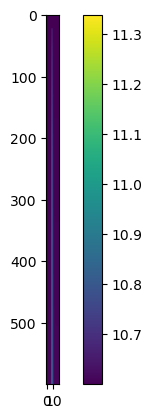

   Delta (abs) to:   10 Time  1.60000E+02 y


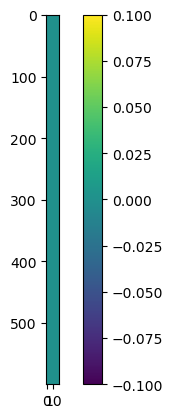

   Delta (log) to:   10 Time  1.60000E+02 y


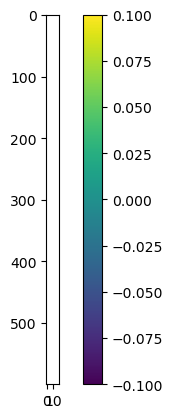

  10 Time  1.60000E+02 y


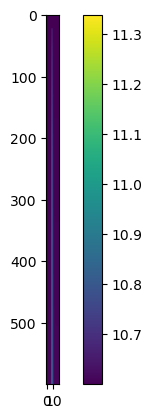

   Delta (abs) to:   11 Time  1.80000E+02 y


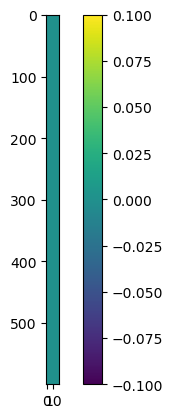

   Delta (log) to:   11 Time  1.80000E+02 y


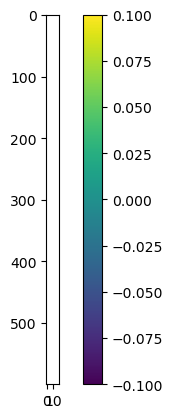

  11 Time  1.80000E+02 y


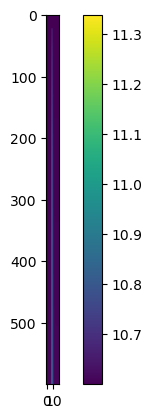

   Delta (abs) to:   12 Time  2.00000E+02 y


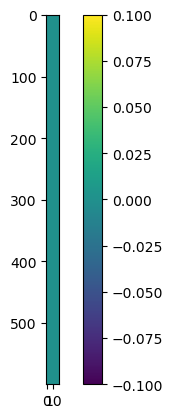

   Delta (log) to:   12 Time  2.00000E+02 y


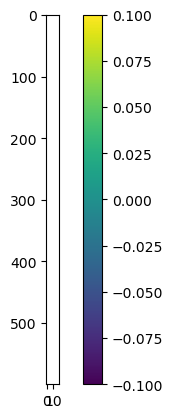

  12 Time  2.00000E+02 y


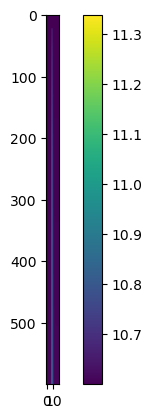

Datapoint: 4
   0 Time  0.00000E+00 y


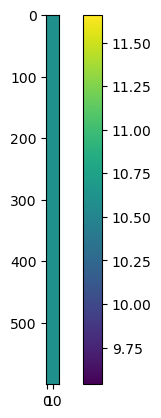

   Delta (abs) to:    1 Time  1.00000E-01 y


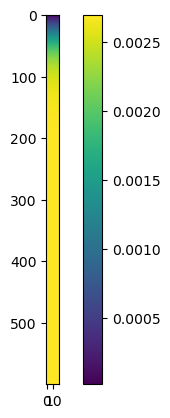

   Delta (log) to:    1 Time  1.00000E-01 y


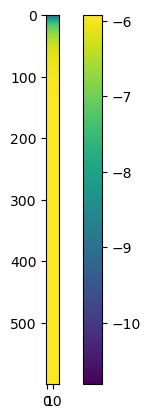

   1 Time  1.00000E-01 y


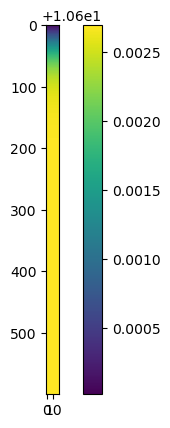

   Delta (abs) to:    2 Time  2.00000E+01 y


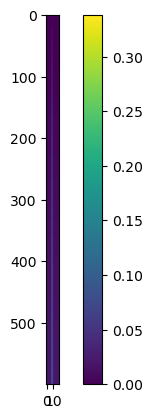

   Delta (log) to:    2 Time  2.00000E+01 y


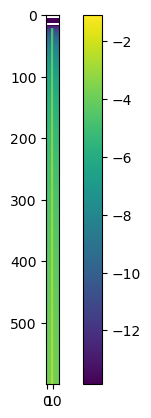

   2 Time  2.00000E+01 y


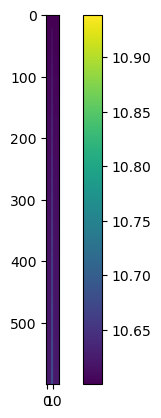

   Delta (abs) to:    3 Time  4.00000E+01 y


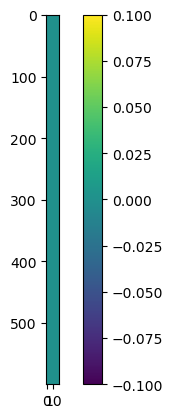

   Delta (log) to:    3 Time  4.00000E+01 y


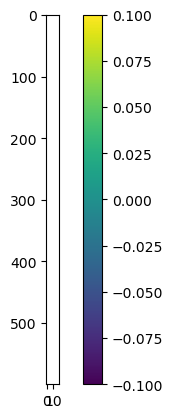

   3 Time  4.00000E+01 y


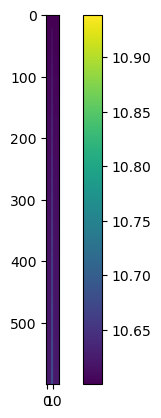

   Delta (abs) to:    4 Time  6.00000E+01 y


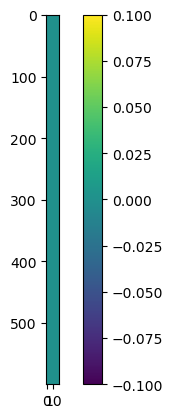

   Delta (log) to:    4 Time  6.00000E+01 y


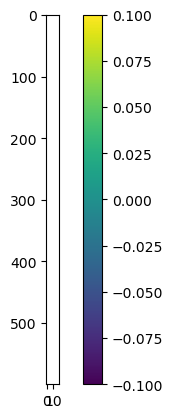

   4 Time  6.00000E+01 y


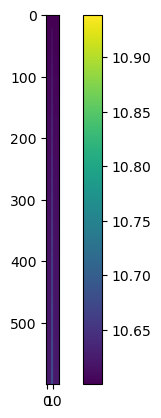

   Delta (abs) to:    5 Time  8.00000E+01 y


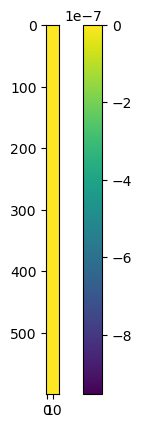

   Delta (log) to:    5 Time  8.00000E+01 y


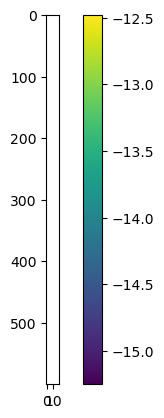

   5 Time  8.00000E+01 y


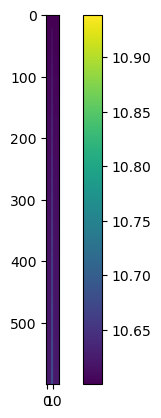

   Delta (abs) to:    6 Time  1.00000E+02 y


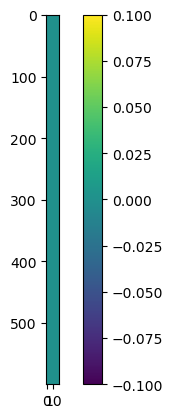

   Delta (log) to:    6 Time  1.00000E+02 y


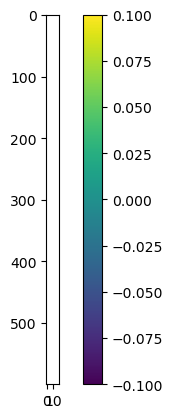

   6 Time  1.00000E+02 y


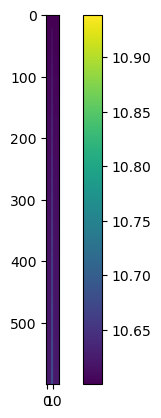

   Delta (abs) to:    7 Time  1.20000E+02 y


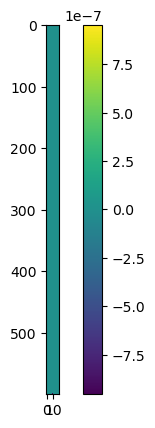

   Delta (log) to:    7 Time  1.20000E+02 y


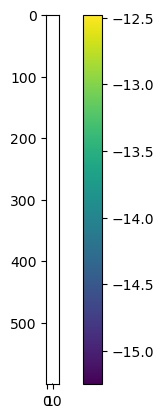

   7 Time  1.20000E+02 y


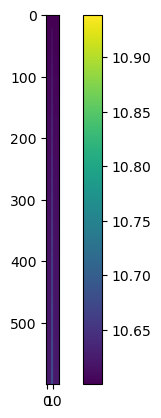

   Delta (abs) to:    8 Time  1.40000E+02 y


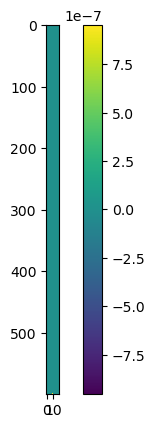

   Delta (log) to:    8 Time  1.40000E+02 y


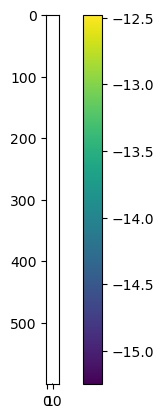

   8 Time  1.40000E+02 y


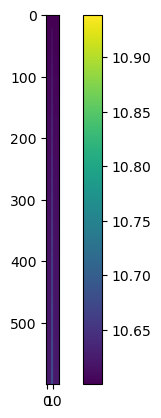

   Delta (abs) to:    9 Time  1.50000E+02 y


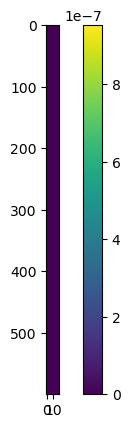

   Delta (log) to:    9 Time  1.50000E+02 y


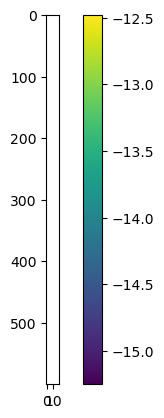

   9 Time  1.50000E+02 y


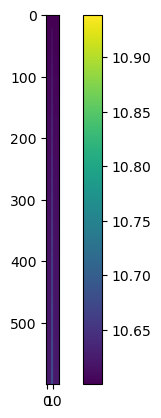

   Delta (abs) to:   10 Time  1.60000E+02 y


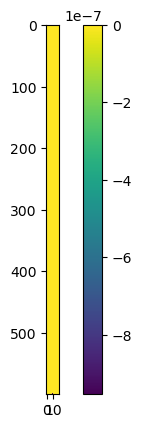

   Delta (log) to:   10 Time  1.60000E+02 y


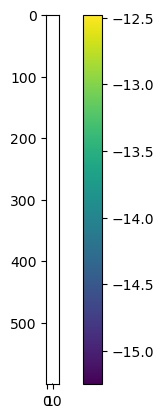

  10 Time  1.60000E+02 y


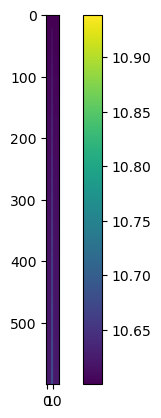

   Delta (abs) to:   11 Time  1.80000E+02 y


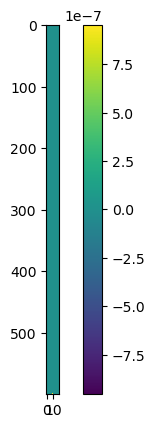

   Delta (log) to:   11 Time  1.80000E+02 y


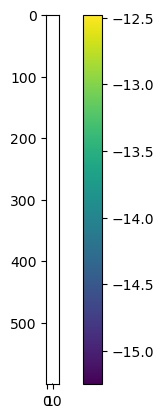

  11 Time  1.80000E+02 y


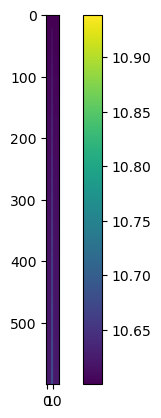

   Delta (abs) to:   12 Time  2.00000E+02 y


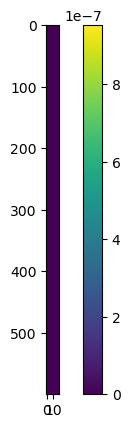

   Delta (log) to:   12 Time  2.00000E+02 y


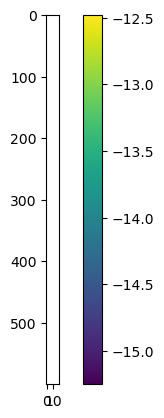

  12 Time  2.00000E+02 y


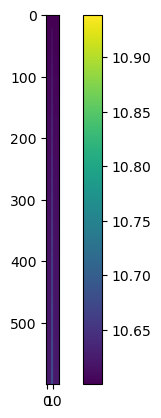

In [7]:
for i in points:
    temp = None
    last_temp = None
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    for time in list(file.keys()):
        dp = file[time]
        last_temp = temp
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape).unsqueeze(0)
        if not (last_temp == None):
            delta = temp.squeeze()[0:upper_end] - last_temp.squeeze()[0:upper_end]
            print("   Delta (abs) to: " + time)
            plt.imshow(delta)
            plt.colorbar()
            plt.show()
            print("   Delta (log) to: " + time)
            plt.imshow(torch.log(torch.abs(delta)))
            plt.colorbar()
            plt.show()
        print(time)
        plt.imshow(temp.squeeze()[0:upper_end])
        plt.colorbar()
        plt.show()

Datapoint: 0
   Pressure gradient: -88.23845794366207
   Permeability: 2.455428588976363e-11


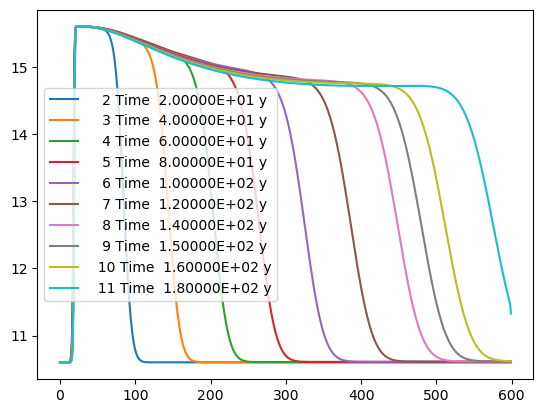

Datapoint: 1
   Pressure gradient: -44.119228971819396
   Permeability: 2e-10


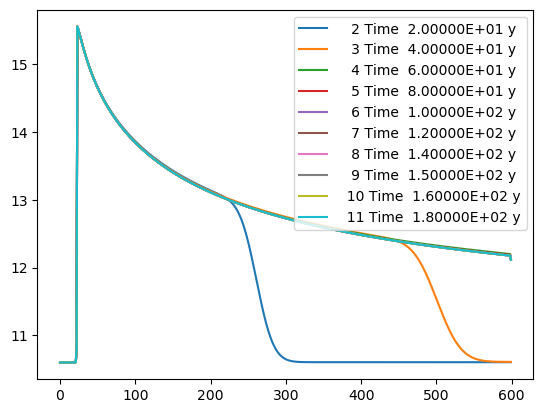

Datapoint: 2
   Pressure gradient: -102.94486760094296
   Permeability: 2e-10


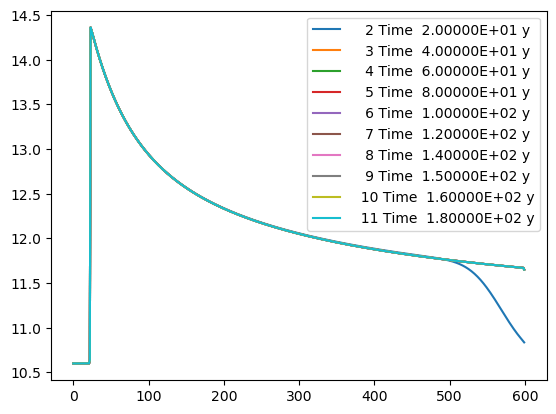

Datapoint: 3
   Pressure gradient: -44.119228971819396
   Permeability: 5e-09


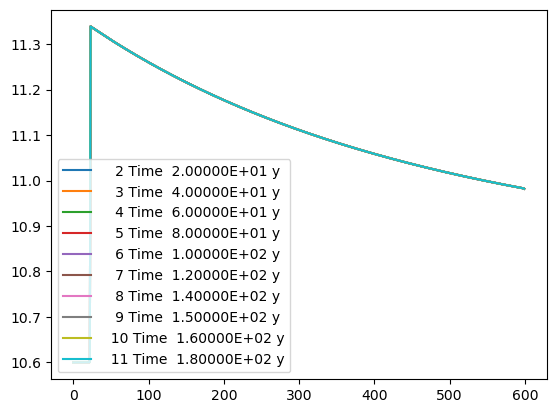

Datapoint: 4
   Pressure gradient: -102.94486760094296
   Permeability: 5e-09


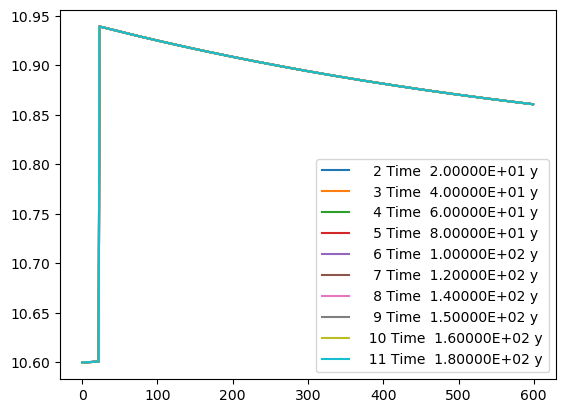

In [14]:
for i in points:
    print("Datapoint: " + str(i))
    file = h5py.File(path + "RUN_" + str(i) + "/pflotran.h5", 'r')
    dp = file["   0 Time  0.00000E+00 y"]
    pressure_gradient = (dp["Liquid Pressure [Pa]"][64] - dp["Liquid Pressure [Pa]"][0])/5.0
    print("   Pressure gradient: " + str(pressure_gradient))
    print("   Permeability: " + str(dp["Permeability X [m^2]"][0]))
    for time in list(file.keys())[2:-1]:
        dp = file[time]
        temp = torch.tensor(dp['Temperature [C]']).float().reshape(shape)
        plt.plot(temp[..., 9], label=time)
        plt.legend()
    plt.show()

# Other stuff

In [46]:
from torch import nn

# prepare 2nd level
prepared_dir_2ndlevel = Path(paths["datasets_prepared_dir"]) / f"{dataset_name} cut_8pieces separate_boxes 2nd level gkt"

info = yaml.safe_load(open(prepared_dir_2ndlevel / "info.yaml", "r"))


file_inputs = prepared_dir_2ndlevel / "Inputs" / "RUN_4001.pt"
inputs = torch.load(file_inputs)
plt.imshow(inputs[1])
plt.show()
plt.imshow(inputs[2])
plt.show()
plt.imshow(inputs[0])
plt.colorbar()
plt.show()


file_labels = prepared_dir_2ndlevel / "Labels" / "RUN_4001.pt"
labels_orig = torch.load(file_labels)
labels = torch.cat([inputs[0:1, -1:, :], labels_orig], dim=1)
labels = nn.functional.pad(labels, (1, 1, 0, 1), "replicate")
plt.imshow(labels[0])
plt.colorbar()
plt.show()
mask = torch.tensor([[(i == 0) or (j == 0 or j == 15) for j in range(16)] for i in range(32)])
labels_orig[0][mask] = torch.zeros_like(labels_orig)[0][mask]
plt.imshow(labels_orig[0])
plt.colorbar()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/sc/pillerls/datasets_prepared/dataset_long_sim_100y cut_8pieces separate_boxes 2nd level gkt/info.yaml'